# Tarea 1: DS Lab
- Ricardo Arancibia
- José Díaz
- Javier Santibáñez

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Parte 1.**

In [2]:
#1.
df_all = pd.read_csv('data/raw/w{}/metrocuadrado_all_w{}.csv'.format(str(13),str(13)))
for NN in range(14,18):
    direc = 'data/raw/w{}/metrocuadrado_all_w{}.csv'.format(str(NN),str(NN))
    df_aux = pd.read_csv(direc)
    # df_all.merge(df_aux)
    df_all = pd.concat([df_all,df_aux], ignore_index= True)
#df_all['Archivo'] = 'all' 
df_all.drop_duplicates(inplace=True, ignore_index= True)
print(df_all.shape)
df_all.head()

(16295, 8)


property_type|rent_type|location       price n_rooms  \
0    Casa en Arriendo, LA SOLEDAD NORTE Bogotá D.C..  $1.050.000       3   
1  Casa en Arriendo, CIUDAD SALITRE SUR-ORIENTAL ...  $3.930.000       3   
2  Casa en Arriendo, VILLA DE LOS ALPES II SECTOR...    $750.000       3   
3        Casa en Arriendo, PARIS GAITAN Bogotá D.C..  $3.400.000       5   
4  Casa en Arriendo, BALCONES DE ORIENTE Bogotá D...  $1.560.000       4   

  n_bath   surface                                            details  \
0      2   63.0 m2  Excelente casa cerca de la calle 80 y Avenida ...   
1      2  100.0 m2  Se arrienda casa bonita totalmente amoblada co...   
2      1   90.0 m2  CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...   
3      4   71.0 m2  casa ezquinera excelente ubicacion cinco alcob...   
4      3   96.0 m2  Excelente casa de tres niveles, buena ubicació...   

                                                 url  metrocuadrado_index  
0  https://www.metrocuadrado.com/inmueble/arriend...                 25.6  
1  https://www.metrocuadrado.com/inmueble/arriend...                 57.3  
2  https://www.metrocuadrado.com/inmueble/arriend...                 12.2  
3  https://www.metrocuadrado.com/inmueble/arriend...                 56.0  
4  https://www.metrocuadrado.com/inmueble/arriend...                 47.1

In [3]:
#1.
df_fur = pd.read_csv('data/raw/w{}/metrocuadrado_furnished_w{}.csv'.format(str(13),str(13)))
for NN in range(14,18):
    direc = 'data/raw/w{}/metrocuadrado_furnished_w{}.csv'.format(str(NN),str(NN))
    df_aux = pd.read_csv(direc)
    # df_fur.merge(df_aux)
    df_fur = pd.concat([df_fur,df_aux], ignore_index= True)
#df_fur['Archivo'] = 'furnished'
df_fur.drop_duplicates(inplace=True, ignore_index= True)
print(df_fur.shape)
df_fur.head()

(2099, 8)


property_type|rent_type|location         price  n_rooms  \
0  Casa en Arriendo, CIUDAD SALITRE SUR-ORIENTAL ...    $3.930.000      3.0   
1  Casa en Venta Y Arriendo, BELLAVISTA Bogotá D.C..    $1.300.000      3.0   
2  Casa en Arriendo, PORTALES DEL NORTE Bogotá D.C..    $1.800.000      3.0   
3  Casa en Venta Y Arriendo, SANTA SOFIA Bogotá D...    $1.500.000      5.0   
4  Casa en Venta Y Arriendo, URBANIZACION SABANA ...  $145.000.000      3.0   

   n_bath   surface                                            details  \
0     2.0  100.0 m2  Se arrienda casa bonita totalmente amoblada co...   
1     2.0   72.0 m2  hermosa casa en venta y en arriendo en, mandal...   
2     3.0  76.81 m2  Estrato 4. CASA TRIPLEX!! Exterior . Cuenta co...   
3     3.0  76.22 m2  Casa en Santa Sofia, excelente ubicación sobre...   
4     2.0   77.0 m2  Casa esquinera, de tres niveles, se venden mue...   

                                                 url  metrocuadrado_index  
0  https://www.metrocuadrado.com/inmueble/arriend...                 57.3  
1  https://www.metrocuadrado.com/inmueble/venta-c...                 41.4  
2  https://www.metrocuadrado.com/inmueble/arriend...                 41.3  
3  https://www.metrocuadrado.com/inmueble/venta-c...                 34.2  
4  https://www.metrocuadrado.com/inmueble/venta-c...                 62.5

In [4]:
#1.

#Paso a -1 los nan primero para poder usar astype
df_fur['n_rooms'] = df_fur.n_rooms.fillna(value = -1).astype(int)
df_fur['n_bath'] = df_fur.n_bath.fillna(value = -1).astype(int)

#Convierto la columna al mismo tipo que en df_all
convert_types = {'n_rooms': str, 'n_bath': str}
df_fur = df_fur.astype(convert_types)

#Uno los df sobre todas las columnas
df2 = pd.merge(df_all, df_fur, how = 'outer', on = list(df_all.columns), indicator=True)


#Reporto el número de observaciones solo en archivo con furnished
right_only = len(df2.loc[df2['_merge'] == 'right_only', '_merge'])
print(f"Observaciones exclusivas del archivo con furnished: {right_only}")

#Cambio los nombres
df2 = df2.astype({'_merge': str})
df2.loc[(df2['_merge'] == 'both') | (df2['_merge'] == 'right_only'), '_merge'] = 'furnished'
df2.loc[(df2['_merge'] == 'left_only'), '_merge'] = 'normal'


#Cambio el nombre de la columna y la convierto a tipo categórica
df2.rename(columns = {'_merge': 'furnished'}, inplace = True)
df2.astype({'furnished': 'category'})

#Relleno valores faltante de df2 usando df_fur
#OBS: se usa un multi-indice triple para obtener un identificador único, salvo filas repetidas
#OBS2: drop = False es para no botar la columna del df y luego solo resetear los índices
A = df2.set_index(['url', 'surface', 'metrocuadrado_index'], drop = False).copy()
B = df_fur.set_index(['url', 'surface', 'metrocuadrado_index'], drop = False).copy()

#Realizo el relleno de datos
df = A.combine_first(B)


#Quito los valores -1 introducidos antes en n_rooms y n_bath para poder cambiar el type de la serie
df.loc[(df['n_rooms'] == str(-1)) , 'n_rooms'] = np.nan
df.loc[df['n_bath'] == str(-1), 'n_bath'] = np.nan

#Arreglo los índices y elimino duplicados
df.reset_index(drop = True, inplace = True)
df.drop_duplicates(inplace=True, ignore_index= True)

df

Observaciones exclusivas del archivo con furnished: 12


details furnished  \
0      Hermoso apartamento con acabados modernos, en ...    normal   
1      APARTAESTUDIO, ACOGEDOR, 47 MTS, UNA ALCOBA, U...    normal   
2      Hermoso apartaestudio con chimenea, excelente ...    normal   
3      Hermoso apartamento con chimenea,garaje, depos...    normal   
4      Hermoso apartamento con espacios bien distribu...    normal   
...                                                  ...       ...   
16302  VENDO O ARRIENDO LINDA CASA, AREA CONSTRUIDA 3...    normal   
16303  Casa de dos pisos 1 piso cuenta con 1 parquead...    normal   
16304  SE VENDE CASA DE DOS NIVELES PRIMER NIVEL CONS...    normal   
16305  Magnífica casa en venta o arriendo. Ubicada en...    normal   
16306  Guaymaral. Espectacular casa en unidad cerrada...    normal   

       metrocuadrado_index n_bath n_rooms        price  \
0                     61.8      1       1   $2.100.000   
1                     44.8      1       1   $1.520.000   
2                     56.3      1       1   $2.300.000   
3                     67.4      1       1   $2.060.000   
4                     49.3      1       1   $1.850.000   
...                    ...    ...     ...          ...   
16302                 53.9      5       4  $10.000.000   
16303                 20.1      2       3   $1.400.000   
16304                 41.8      2       2     $700.000   
16305                 48.6      3       3   $2.800.000   
16306                 23.7      5       4   $9.000.000   

                        property_type|rent_type|location   surface  \
0                  Apartamento en Arriendo, Bogotá D.C..   44.0 m2   
1                  Apartamento en Arriendo, Bogotá D.C..   47.0 m2   
2                  Apartamento en Arriendo, Bogotá D.C..   60.0 m2   
3                  Apartamento en Arriendo, Bogotá D.C..   65.0 m2   
4                  Apartamento en Arriendo, Bogotá D.C..   40.0 m2   
...                                                  ...       ...   
16302  Casa en Venta Y Arriendo, VILLA DEL PRADO Bogo...  330.0 m2   
16303  Casa en Venta Y Arriendo, VILLA DEL RIO Bogotá...  110.0 m2   
16304  Casa en Venta Y Arriendo, VILLA RIOS Bogotá D.C..   93.0 m2   
16305  Casa en Venta Y Arriendo, VILLAS DEL MEDITERRA...  174.0 m2   
16306     Casa en Venta Y Arriendo, VIVEROS Bogotá D.C..  376.0 m2   

                                                     url  
0      https://www.metrocuadrado.com/inmueble/arriend...  
1      https://www.metrocuadrado.com/inmueble/arriend...  
2      https://www.metrocuadrado.com/inmueble/arriend...  
3      https://www.metrocuadrado.com/inmueble/arriend...  
4      https://www.metrocuadrado.com/inmueble/arriend...  
...                                                  ...  
16302  https://www.metrocuadrado.com/inmueble/venta-c...  
16303  https://www.metrocuadrado.com/inmueble/venta-c...  
16304  https://www.metrocuadrado.com/inmueble/venta-c...  
16305  https://www.metrocuadrado.com/inmueble/venta-c...  
16306  https://www.metrocuadrado.com/inmueble/venta-c...  

[16307 rows x 9 columns]

In [5]:
df.isna().sum()

details                             110
furnished                             0
metrocuadrado_index                   0
n_bath                              232
n_rooms                              34
price                                 0
property_type|rent_type|location      0
surface                               0
url                                   0
dtype: int64

**Parte 2.**

**(a)**

In [6]:
#Limpio los valores nan

df.dropna(subset=['price','n_rooms','n_bath','surface'], inplace=True)
df.reset_index(drop=True,inplace=True)
print(df.shape)

(16056, 9)


In [7]:
#Limpio símbolos especiales y defino tipos adecuados

df['price'] = df['price'].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace('.','')).astype(np.float64)
df['surface'] = df['surface'].apply(lambda x: x.replace('m2','')).astype(np.float64)
df['n_bath'] = df['n_bath'].apply(lambda x: x.replace('+','')).astype(np.int64)
df['n_rooms'] = df['n_rooms'].apply(lambda x: x.replace('+','')).astype(np.int64)

df.head()

details furnished  \
0  Hermoso apartamento con acabados modernos, en ...    normal   
1  APARTAESTUDIO, ACOGEDOR, 47 MTS, UNA ALCOBA, U...    normal   
2  Hermoso apartaestudio con chimenea, excelente ...    normal   
3  Hermoso apartamento con chimenea,garaje, depos...    normal   
4  Hermoso apartamento con espacios bien distribu...    normal   

   metrocuadrado_index  n_bath  n_rooms      price  \
0                 61.8       1        1  2100000.0   
1                 44.8       1        1  1520000.0   
2                 56.3       1        1  2300000.0   
3                 67.4       1        1  2060000.0   
4                 49.3       1        1  1850000.0   

        property_type|rent_type|location  surface  \
0  Apartamento en Arriendo, Bogotá D.C..     44.0   
1  Apartamento en Arriendo, Bogotá D.C..     47.0   
2  Apartamento en Arriendo, Bogotá D.C..     60.0   
3  Apartamento en Arriendo, Bogotá D.C..     65.0   
4  Apartamento en Arriendo, Bogotá D.C..     40.0   

                                                 url  
0  https://www.metrocuadrado.com/inmueble/arriend...  
1  https://www.metrocuadrado.com/inmueble/arriend...  
2  https://www.metrocuadrado.com/inmueble/arriend...  
3  https://www.metrocuadrado.com/inmueble/arriend...  
4  https://www.metrocuadrado.com/inmueble/arriend...

In [ ]:
df.price.nsmallest(10)

In [ ]:
df.surface.nsmallest(10)

In [8]:
#Quito los precios nulos y las superficies menores o iguales a 4m^2

df.loc[df.price == 0, 'price'] = np.nan
df.loc[df.surface <= 4, 'surface'] = np.nan

df.dropna(subset = ['price', 'surface'], how = 'any', inplace = True)

print(f'El DataFrame queda con {len(df) } observaciones ')

df

El DataFrame queda con 16047 observaciones 


details furnished  \
0      Hermoso apartamento con acabados modernos, en ...    normal   
1      APARTAESTUDIO, ACOGEDOR, 47 MTS, UNA ALCOBA, U...    normal   
2      Hermoso apartaestudio con chimenea, excelente ...    normal   
3      Hermoso apartamento con chimenea,garaje, depos...    normal   
4      Hermoso apartamento con espacios bien distribu...    normal   
...                                                  ...       ...   
16051  VENDO O ARRIENDO LINDA CASA, AREA CONSTRUIDA 3...    normal   
16052  Casa de dos pisos 1 piso cuenta con 1 parquead...    normal   
16053  SE VENDE CASA DE DOS NIVELES PRIMER NIVEL CONS...    normal   
16054  Magnífica casa en venta o arriendo. Ubicada en...    normal   
16055  Guaymaral. Espectacular casa en unidad cerrada...    normal   

       metrocuadrado_index  n_bath  n_rooms       price  \
0                     61.8       1        1   2100000.0   
1                     44.8       1        1   1520000.0   
2                     56.3       1        1   2300000.0   
3                     67.4       1        1   2060000.0   
4                     49.3       1        1   1850000.0   
...                    ...     ...      ...         ...   
16051                 53.9       5        4  10000000.0   
16052                 20.1       2        3   1400000.0   
16053                 41.8       2        2    700000.0   
16054                 48.6       3        3   2800000.0   
16055                 23.7       5        4   9000000.0   

                        property_type|rent_type|location  surface  \
0                  Apartamento en Arriendo, Bogotá D.C..     44.0   
1                  Apartamento en Arriendo, Bogotá D.C..     47.0   
2                  Apartamento en Arriendo, Bogotá D.C..     60.0   
3                  Apartamento en Arriendo, Bogotá D.C..     65.0   
4                  Apartamento en Arriendo, Bogotá D.C..     40.0   
...                                                  ...      ...   
16051  Casa en Venta Y Arriendo, VILLA DEL PRADO Bogo...    330.0   
16052  Casa en Venta Y Arriendo, VILLA DEL RIO Bogotá...    110.0   
16053  Casa en Venta Y Arriendo, VILLA RIOS Bogotá D.C..     93.0   
16054  Casa en Venta Y Arriendo, VILLAS DEL MEDITERRA...    174.0   
16055     Casa en Venta Y Arriendo, VIVEROS Bogotá D.C..    376.0   

                                                     url  
0      https://www.metrocuadrado.com/inmueble/arriend...  
1      https://www.metrocuadrado.com/inmueble/arriend...  
2      https://www.metrocuadrado.com/inmueble/arriend...  
3      https://www.metrocuadrado.com/inmueble/arriend...  
4      https://www.metrocuadrado.com/inmueble/arriend...  
...                                                  ...  
16051  https://www.metrocuadrado.com/inmueble/venta-c...  
16052  https://www.metrocuadrado.com/inmueble/venta-c...  
16053  https://www.metrocuadrado.com/inmueble/venta-c...  
16054  https://www.metrocuadrado.com/inmueble/venta-c...  
16055  https://www.metrocuadrado.com/inmueble/venta-c...  

[16047 rows x 9 columns]

**(b)**

In [9]:
new_columns = df['property_type|rent_type|location'].str.split(",", expand = True) 
df['property_type'] = new_columns[0].str.split("en", expand = True)[0].str.strip()
df['rent_type'] = new_columns[0].str.split("en ", expand = True)[1].str.strip()
df['location'] = new_columns[1].str.strip().str.slice(0,-13,1).str.upper()

df.drop(['property_type|rent_type|location'], axis=1, inplace=True)

df

details furnished  \
0      Hermoso apartamento con acabados modernos, en ...    normal   
1      APARTAESTUDIO, ACOGEDOR, 47 MTS, UNA ALCOBA, U...    normal   
2      Hermoso apartaestudio con chimenea, excelente ...    normal   
3      Hermoso apartamento con chimenea,garaje, depos...    normal   
4      Hermoso apartamento con espacios bien distribu...    normal   
...                                                  ...       ...   
16051  VENDO O ARRIENDO LINDA CASA, AREA CONSTRUIDA 3...    normal   
16052  Casa de dos pisos 1 piso cuenta con 1 parquead...    normal   
16053  SE VENDE CASA DE DOS NIVELES PRIMER NIVEL CONS...    normal   
16054  Magnífica casa en venta o arriendo. Ubicada en...    normal   
16055  Guaymaral. Espectacular casa en unidad cerrada...    normal   

       metrocuadrado_index  n_bath  n_rooms       price  surface  \
0                     61.8       1        1   2100000.0     44.0   
1                     44.8       1        1   1520000.0     47.0   
2                     56.3       1        1   2300000.0     60.0   
3                     67.4       1        1   2060000.0     65.0   
4                     49.3       1        1   1850000.0     40.0   
...                    ...     ...      ...         ...      ...   
16051                 53.9       5        4  10000000.0    330.0   
16052                 20.1       2        3   1400000.0    110.0   
16053                 41.8       2        2    700000.0     93.0   
16054                 48.6       3        3   2800000.0    174.0   
16055                 23.7       5        4   9000000.0    376.0   

                                                     url property_type  \
0      https://www.metrocuadrado.com/inmueble/arriend...       Apartam   
1      https://www.metrocuadrado.com/inmueble/arriend...       Apartam   
2      https://www.metrocuadrado.com/inmueble/arriend...       Apartam   
3      https://www.metrocuadrado.com/inmueble/arriend...       Apartam   
4      https://www.metrocuadrado.com/inmueble/arriend...       Apartam   
...                                                  ...           ...   
16051  https://www.metrocuadrado.com/inmueble/venta-c...          Casa   
16052  https://www.metrocuadrado.com/inmueble/venta-c...          Casa   
16053  https://www.metrocuadrado.com/inmueble/venta-c...          Casa   
16054  https://www.metrocuadrado.com/inmueble/venta-c...          Casa   
16055  https://www.metrocuadrado.com/inmueble/venta-c...          Casa   

              rent_type                 location  
0              Arriendo                           
1              Arriendo                           
2              Arriendo                           
3              Arriendo                           
4              Arriendo                           
...                 ...                      ...  
16051  Venta Y Arriendo          VILLA DEL PRADO  
16052  Venta Y Arriendo            VILLA DEL RIO  
16053  Venta Y Arriendo               VILLA RIOS  
16054  Venta Y Arriendo  VILLAS DEL MEDITERRANEO  
16055  Venta Y Arriendo                  VIVEROS  

[16047 rows x 11 columns]

**Parte 3.**

**(a)**

In [10]:
df['price by m2'] = df['price']/df['surface']

**(b)**

In [11]:
df['n_garajes'] = [ '0' if x.find('-garajes')==-1 else x[x.find('banos-')+6: x.find('-garajes')] for x in df['url']]
df['n_garajes'] = df['n_garajes'].apply(lambda x: x.replace('4+','5')).astype(np.int64)

**Parte 4.**

In [12]:
df['tipo_producto'] = np.zeros(len(df)) # categoria 0
indices=df.query('80<=surface <120 and property_type=="Casa"').index
df.loc[indices,'tipo_producto'] = 1
indices=df.query('120<=surface <180 and property_type=="Casa"').index
df.loc[indices,'tipo_producto'] = 2
indices=df.query('180<=surface <240 and property_type=="Casa"').index
df.loc[indices,'tipo_producto'] = 3
indices=df.query('240<=surface <360 and property_type=="Casa"').index
df.loc[indices,'tipo_producto'] = 4
indices=df.query('360<=surface <=460 and property_type=="Casa"').index
df.loc[indices,'tipo_producto'] = 5
indices=df.query('40<=surface <60 and property_type=="Apartam"').index
df.loc[indices,'tipo_producto'] = 6
indices=df.query('60<=surface <80 and property_type=="Apartam"').index
df.loc[indices,'tipo_producto'] = 7
indices=df.query('80<=surface <=120 and property_type=="Apartam"').index
df.loc[indices,'tipo_producto'] = 8

**Parte 5.**

In [13]:
# 5
df_upz = pd.read_csv('data/asignacion_upz/barrio-upz.csv')
print(df_upz.shape)
df_upz

(468, 5)


UPlCodigo  UPlTipo          UPlNombre       UPlArea   pro_location
0      UPZ100        1           GALERIAS  2.375681e+06        palermo
1      UPZ100        1           GALERIAS  2.375681e+06     belalcazar
2      UPZ100        1           GALERIAS  2.375681e+06          sears
3      UPZ100        1           GALERIAS  2.375681e+06       galerias
4      UPZ100        1           GALERIAS  2.375681e+06  banco central
..        ...      ...                ...           ...            ...
463     UPZ42        1            VENECIA  6.638420e+06     nuevo muzu
464     UPZ42        1            VENECIA  6.638420e+06      el condor
465     UPZ42        1            VENECIA  6.638420e+06       laguneta
466     UPZ52        1           LA FLORA  1.877160e+06    villa maria
467     UPZ60        1  PARQUE ENTRENUBES  4.190395e+06            NaN

[468 rows x 5 columns]

In [14]:
df_upz['pro_location'] = df_upz['pro_location'].str.upper()
pd.unique(df_upz['pro_location'])

array(['PALERMO', 'BELALCAZAR', 'SEARS', 'GALERIAS', 'BANCO CENTRAL',
       'EL CAMPIN', 'SAN JOSE', 'LAS MARGARITAS', 'CENTRO NARIÑO',
       'GRAN AMERICA', 'ACEVEDO TEJADA', 'EL RECUERDO', 'QUINTA PAREDES',
       'SALITRE I', 'ARMENIA', 'LA VICTORIA', 'CANTAGALLO',
       'CENTRO ADMINISTRATIVO', 'LA SOLEDAD', 'SANTA TERESA',
       'SANTA TERESITA', 'LA MACARENA', 'BOGOTÁ D.C.', 'SAN MARTIN',
       'LA MERCED', 'SAMPER', 'LA CAPUCHINA', 'SAGRADO CORAZON',
       'GRAN BRITALIA I', 'BRITALIA', 'ESTACION CENTRAL',
       'ZONA INDUSTRIAL', 'AMERICAS OCCIDENTAL', 'I SECTOR',
       'VILLEMAR FONTIBON', 'CENTENARIO', 'EL CARMEN FONTIBON', 'CARMEN',
       'GRANADA', 'COFRADIA', 'CENTRO FONTIBON', 'BOSTON', 'VERSALLES',
       'ATAHUALPA', 'EL SALITRE', 'POPULAR MODELO', 'TAPETE', 'ESTRELLA',
       'DOCE DE OCTUBRE', 'JORGE ELIECER GAITAN', 'SAN FERNANDO',
       'ESCUELA MILITAR', 'CAPELLANIA', 'MODELIA OCCIDENTAL', 'MODELIA',
       'MALLORCA', 'PLENITUD', 'LAGO GAITAN', 'PARQUE P

In [15]:
df_UPZ = pd.merge(df, df_upz, how = 'left', left_on = 'location', right_on = 'pro_location')
df_UPZ

details furnished  \
0      Hermoso apartamento con acabados modernos, en ...    normal   
1      APARTAESTUDIO, ACOGEDOR, 47 MTS, UNA ALCOBA, U...    normal   
2      Hermoso apartaestudio con chimenea, excelente ...    normal   
3      Hermoso apartamento con chimenea,garaje, depos...    normal   
4      Hermoso apartamento con espacios bien distribu...    normal   
...                                                  ...       ...   
16042  VENDO O ARRIENDO LINDA CASA, AREA CONSTRUIDA 3...    normal   
16043  Casa de dos pisos 1 piso cuenta con 1 parquead...    normal   
16044  SE VENDE CASA DE DOS NIVELES PRIMER NIVEL CONS...    normal   
16045  Magnífica casa en venta o arriendo. Ubicada en...    normal   
16046  Guaymaral. Espectacular casa en unidad cerrada...    normal   

       metrocuadrado_index  n_bath  n_rooms       price  surface  \
0                     61.8       1        1   2100000.0     44.0   
1                     44.8       1        1   1520000.0     47.0   
2                     56.3       1        1   2300000.0     60.0   
3                     67.4       1        1   2060000.0     65.0   
4                     49.3       1        1   1850000.0     40.0   
...                    ...     ...      ...         ...      ...   
16042                 53.9       5        4  10000000.0    330.0   
16043                 20.1       2        3   1400000.0    110.0   
16044                 41.8       2        2    700000.0     93.0   
16045                 48.6       3        3   2800000.0    174.0   
16046                 23.7       5        4   9000000.0    376.0   

                                                     url property_type  \
0      https://www.metrocuadrado.com/inmueble/arriend...       Apartam   
1      https://www.metrocuadrado.com/inmueble/arriend...       Apartam   
2      https://www.metrocuadrado.com/inmueble/arriend...       Apartam   
3      https://www.metrocuadrado.com/inmueble/arriend...       Apartam   
4      https://www.metrocuadrado.com/inmueble/arriend...       Apartam   
...                                                  ...           ...   
16042  https://www.metrocuadrado.com/inmueble/venta-c...          Casa   
16043  https://www.metrocuadrado.com/inmueble/venta-c...          Casa   
16044  https://www.metrocuadrado.com/inmueble/venta-c...          Casa   
16045  https://www.metrocuadrado.com/inmueble/venta-c...          Casa   
16046  https://www.metrocuadrado.com/inmueble/venta-c...          Casa   

              rent_type                 location   price by m2  n_garajes  \
0              Arriendo                           47727.272727          1   
1              Arriendo                           32340.425532          1   
2              Arriendo                           38333.333333          1   
3              Arriendo                           31692.307692          1   
4              Arriendo                           46250.000000          1   
...                 ...                      ...           ...        ...   
16042  Venta Y Arriendo          VILLA DEL PRADO  30303.030303          3   
16043  Venta Y Arriendo            VILLA DEL RIO  12727.272727          1   
16044  Venta Y Arriendo               VILLA RIOS   7526.881720          1   
16045  Venta Y Arriendo  VILLAS DEL MEDITERRANEO  16091.954023          2   
16046  Venta Y Arriendo                  VIVEROS  23936.170213          4   

       tipo_producto UPlCodigo  UPlTipo            UPlNombre       UPlArea  \
0                6.0       NaN      NaN                  NaN           NaN   
1                6.0       NaN      NaN                  NaN           NaN   
2                7.0       NaN      NaN                  NaN           NaN   
3                7.0       NaN      NaN                  NaN           NaN   
4                6.0       NaN      NaN                  NaN           NaN   
...              ...       ...      ...                  ...           ...   
16042            4.0     UPZ17 

In [18]:
percNonUPZ = 100 * df_UPZ['pro_location'].isna().sum()/df_UPZ.shape[0]

print(f'Porcentaje de observaciones a las que no se les puede adjuntar UPZ: \n {np.round(percNonUPZ,2)} %')

Porcentaje de observaciones a las que no se les puede adjuntar UPZ: 
 11.95 %


**Parte 6.**

In [19]:
# 6
df_stdpob = pd.read_csv('data/estadisticas_upz/estadisticas_poblacion.csv')
df_stdpob.drop(['Unnamed: 0', 'nomupz'], inplace=True, axis=1)
df_stdpob

upz  personas  trabajoinf_ninos_5_17_anos_perc  \
0    UPZ11     68430                              0.6   
1    UPZ12     50037                              1.8   
2    UPZ13    102981                              0.0   
3    UPZ18     69961                              0.4   
4    UPZ19    121158                              0.3   
..     ...       ...                              ...   
107  UPZ63     63145                              1.8   
108  UPZ90     53837                              0.0   
109  UPZ99     53837                              0.0   
110  UPZ97     52951                              0.0   
111  UPZ88     52951                              0.0   

     trabajoinfampliado_ninos_5_17_anos_perc  jovenes_14_24_anos_nini_perc  \
0                                        3.9                          20.7   
1                                       16.7                           9.1   
2                                        3.5                           5.5   
3                                        7.2                           9.4   
4                                        8.0                           8.2   
..                                       ...                           ...   
107                                      8.5                          25.3   
108                                     30.2                           8.2   
109                                     30.2                           8.2   
110                                     17.0                           4.3   
111                                     17.0                           4.3   

     indice_envegecimiento  jefe_mujer_perc  adultos_mayores_pobres_perc  
0                     35.2        44.579934                    17.931973  
1                     54.7        36.279630                     5.420442  
2                    118.4        33.286852                     3.250000  
3                     42.7        36.465059                     9.439051  
4                     59.1        32.887202                     5.406574  
..                     ...              ...                          ...  
107                   16.9        46.147748                    44.985942  
108                   81.4        47.033692                     5.814843  
109                   81.4        47.033692                     5.814843  
110                  153.4        44.667815                     5.401917  
111                  153.4        44.667815                     5.401917  

[112 rows x 8 columns]

In [20]:
df_indsec = pd.read_csv('data/estadisticas_upz/indice_inseguridad.csv')
df_indsec.drop(['Unnamed: 0', 'UPlNombre2'], inplace=True, axis=1)
df_indsec

UPlCodigo  indice_inseguridad
0      UPZ100            0.671141
1       UPZ83            0.000000
2      UPZ107            2.318841
3      UPZ101            3.629032
4       UPZ91           13.537118
..        ...                 ...
113     UPZ42            2.967359
114         3           80.000000
115         4            0.000000
116         5            0.000000
117         1           97.916667

[118 rows x 2 columns]

In [21]:
df_green = pd.read_csv('data/estadisticas_upz/porcentaje_areas_verdes.csv')
df_green['cod_upz'] = 'UPZ' + df_green['cod_upz'].astype(int).astype(str)
df_green.drop(['Unnamed: 0', 'upz'], inplace=True, axis=1)
df_green

cod_upz  areas_verdes_perc
0     UPZ51          58.196667
1     UPZ87          85.924848
2      UPZ1          83.966495
3     UPZ64          85.778144
4     UPZ29          37.852289
..      ...                ...
108   UPZ32          43.425594
109   UPZ95           8.989821
110  UPZ117           3.855842
111    UPZ9          31.543824
112   UPZ30          26.656117

[113 rows x 2 columns]

In [22]:
df_STD = pd.merge(df_UPZ, df_stdpob, how = 'left', left_on = 'UPlCodigo', right_on = 'upz')
df_STD = pd.merge(df_STD, df_indsec, how = 'left', on = 'UPlCodigo')
df_STD = pd.merge(df_STD, df_green, how = 'left', left_on = 'UPlCodigo', right_on = 'cod_upz')
df_STD

details furnished  \
0      Hermoso apartamento con acabados modernos, en ...    normal   
1      APARTAESTUDIO, ACOGEDOR, 47 MTS, UNA ALCOBA, U...    normal   
2      Hermoso apartaestudio con chimenea, excelente ...    normal   
3      Hermoso apartamento con chimenea,garaje, depos...    normal   
4      Hermoso apartamento con espacios bien distribu...    normal   
...                                                  ...       ...   
16044  VENDO O ARRIENDO LINDA CASA, AREA CONSTRUIDA 3...    normal   
16045  Casa de dos pisos 1 piso cuenta con 1 parquead...    normal   
16046  SE VENDE CASA DE DOS NIVELES PRIMER NIVEL CONS...    normal   
16047  Magnífica casa en venta o arriendo. Ubicada en...    normal   
16048  Guaymaral. Espectacular casa en unidad cerrada...    normal   

       metrocuadrado_index  n_bath  n_rooms       price  surface  \
0                     61.8       1        1   2100000.0     44.0   
1                     44.8       1        1   1520000.0     47.0   
2                     56.3       1        1   2300000.0     60.0   
3                     67.4       1        1   2060000.0     65.0   
4                     49.3       1        1   1850000.0     40.0   
...                    ...     ...      ...         ...      ...   
16044                 53.9       5        4  10000000.0    330.0   
16045                 20.1       2        3   1400000.0    110.0   
16046                 41.8       2        2    700000.0     93.0   
16047                 48.6       3        3   2800000.0    174.0   
16048                 23.7       5        4   9000000.0    376.0   

                                                     url property_type  \
0      https://www.metrocuadrado.com/inmueble/arriend...       Apartam   
1      https://www.metrocuadrado.com/inmueble/arriend...       Apartam   
2      https://www.metrocuadrado.com/inmueble/arriend...       Apartam   
3      https://www.metrocuadrado.com/inmueble/arriend...       Apartam   
4      https://www.metrocuadrado.com/inmueble/arriend...       Apartam   
...                                                  ...           ...   
16044  https://www.metrocuadrado.com/inmueble/venta-c...          Casa   
16045  https://www.metrocuadrado.com/inmueble/venta-c...          Casa   
16046  https://www.metrocuadrado.com/inmueble/venta-c...          Casa   
16047  https://www.metrocuadrado.com/inmueble/venta-c...          Casa   
16048  https://www.metrocuadrado.com/inmueble/venta-c...          Casa   

              rent_type  ... personas  trabajoinf_ninos_5_17_anos_perc  \
0              Arriendo  ...      NaN                              NaN   
1              Arriendo  ...      NaN                              NaN   
2              Arriendo  ...      NaN                              NaN   
3              Arriendo  ...      NaN                              NaN   
4              Arriendo  ...      NaN                              NaN   
...                 ...  ...      ...                              ...   
16044  Venta Y Arriendo  ...  66427.0                              0.2   
16045  Venta Y Arriendo  ...  56247.0                              1.5   
16046  Venta Y Arriendo  ...      NaN                              NaN   
16047  Venta Y Arriendo  ...      NaN                              NaN   
16048  Venta Y Arriendo  ...      NaN                              NaN   

       trabajoinfampliado_ninos_5_17_anos_perc  jovenes_14_24_anos_nini_perc  \
0                                          NaN                           NaN   
1                                          NaN                           NaN   
2                                          NaN                           NaN   
3                                          NaN                           NaN   
4                                          NaN                           NaN   
...                                        ...                           ...   
16044                                     17.6       

In [23]:
df_STD['Densidad'] = df_STD['personas']/df_STD['UPlArea']
df_STD['Densidad'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_STD.dropna(subset=['Densidad'], how="all", inplace=True)
df_STD['Densidad'].max()

0.07381499667318157

In [24]:
print('Numero de observaciones a los que no se les puede adjuntar un codigo UPZ: ', df_STD['UPlCodigo'].isna().sum())
print("Porcentaje asignable: ", round((len(df_STD)-df_STD['UPlCodigo'].isna().sum())/len(df_STD)*100,1))
df_STD.dropna(subset=['UPlCodigo'], inplace=True)
df_STD.reset_index(drop=True,inplace=True)

Numero de observaciones a los que no se les puede adjuntar un codigo UPZ:  0
Porcentaje asignable:  100.0


## P2

In [523]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
sinplot()

In [524]:
#1
def estilo(sty = "whitegrid"):
    param = {'axes.facecolor': 'white',
             'axes.edgecolor': 'black',
             'axes.grid': True,
             'axes.axisbelow': 'line',
             'axes.labelcolor': 'black',
             'figure.facecolor': (1, 1, 1, 0),
             'grid.color': '#b0b0b0',
             'grid.linestyle': '-',
             'text.color': 'black',
             'xtick.color': 'red',
             'ytick.color': 'black',
             'xtick.direction': 'out',
             'ytick.direction': 'out',
             'lines.solid_capstyle': 'projecting',
             'patch.edgecolor': 'black',
             'image.cmap': 'viridis',
             'font.family': ['sans-serif'],
             'font.sans-serif': ['DejaVu Sans',
             'Bitstream Vera Sans',
             'Computer Modern Sans Serif',
             'Lucida Grande',
             'Verdana',
             'Geneva',
             'Lucid',
             'Arial',
             'Helvetica',
             'Avant Garde',
             'sans-serif'],
             'patch.force_edgecolor': False,
             'xtick.bottom': True,
             'xtick.top': False,
             'ytick.left': True,
             'ytick.right': False,
             'axes.spines.left': True,
             'axes.spines.bottom': True,
             'axes.spines.right': False,
             'axes.spines.top': False}
    sns.set_style(sty, param)

estilo()
sinplot()

In [587]:
#2
#df_STD_backup = df_STD
df_STD = df_STD_backup
[print("'" + df_STD.columns[i] + "',") for i in range(len(df_STD.columns))]
print()

'price',
'n_rooms',
'n_bath',
'surface',
'details',
'url',
'metrocuadrado_index',
'furnished',
'property_type',
'rent_type',
'location',
'price by m2',
'n_garajes',
'tipo_producto',
'UPlCodigo',
'UPlTipo',
'UPlNombre',
'UPlArea',
'pro_location',
'upz',
'personas',
'trabajoinf_ninos_5_17_anos_perc',
'trabajoinfampliado_ninos_5_17_anos_perc',
'jovenes_14_24_anos_nini_perc',
'indice_envegecimiento',
'jefe_mujer_perc',
'adultos_mayores_pobres_perc',
'indice_inseguridad',
'cod_upz',
'areas_verdes_perc',
'Densidad',



In [588]:
general_info = ['n_rooms',
                'n_bath',
                'metrocuadrado_index',
                'furnished',
                'property_type',
                'rent_type',
                'price by m2',
                'n_garajes',
                'tipo_producto',
                'trabajoinf_ninos_5_17_anos_perc',
                'trabajoinfampliado_ninos_5_17_anos_perc',
                'jovenes_14_24_anos_nini_perc',
                'indice_envegecimiento',
                'jefe_mujer_perc',
                'adultos_mayores_pobres_perc',
                'indice_inseguridad',
                'areas_verdes_perc',
                'Densidad']

property_info = ['price', 
                 'n_rooms', 
                 'n_bath', 
                 'surface', 
                 'metrocuadrado_index', 
                 "furnished", 
                 "property_type", 
                 "rent_type",
                 "location", 
                 "price by m2", 
                 "n_garajes", 
                 "UPlCodigo"]

location_info = ["location", "price by m2", "surface", "UPlCodigo"]

numerical_info = [  'price',
                    #'n_rooms',
                    #'n_bath',
                    'surface',
                    'metrocuadrado_index',
                    'price by m2',
                    #'n_garajes',
                    'personas',
                    'UPlArea',
                    'trabajoinf_ninos_5_17_anos_perc',
                    'trabajoinfampliado_ninos_5_17_anos_perc',
                    'jovenes_14_24_anos_nini_perc',
                    'indice_envegecimiento',
                    'jefe_mujer_perc',
                    'adultos_mayores_pobres_perc',
                    'indice_inseguridad',
                    'areas_verdes_perc',
                    'Densidad']



other_info = [  'details',
                'url']

categorical_info = list(set(df_STD.columns) - set(numerical_info) - set(other_info))



In [589]:
mapping = [('numeric', col) for col in numerical_info]
mapping.extend([('categorical', col) for col in categorical_info])
'''
Se reordenan las columnas del dataframe para que coincidan con el esquema 
del multi indice
'''

df_cat = df_STD.reindex(columns=numerical_info + categorical_info)

In [590]:
df_cat.columns = pd.MultiIndex.from_tuples(mapping)

In [636]:
#3
null_values = pd.DataFrame()
null_values['variables'] = df_STD.columns
null_values['null values'] = [df_STD[df_STD.columns[i]].isna().sum() for i in range(len(df_STD.columns))]

print(null_values)

df_STD.info()

                                  variables  null values
0                                     price            0
1                                   n_rooms            0
2                                    n_bath            0
3                                   surface            0
4                                   details           13
5                                       url            0
6                       metrocuadrado_index            0
7                                 furnished            0
8                             property_type            0
9                                 rent_type            0
10                                 location            0
11                              price by m2            0
12                                n_garajes            0
13                            tipo_producto            0
14                                UPlCodigo            0
15                                  UPlTipo            0
16                             

In [638]:
df_STD.replace('nan',np.nan, inplace = True) 

In [639]:
df.isnull().sum().nlargest(10)

details                63
price                   0
n_rooms                 0
n_bath                  0
surface                 0
url                     0
metrocuadrado_index     0
furnished               0
property_type           0
rent_type               0
dtype: int64

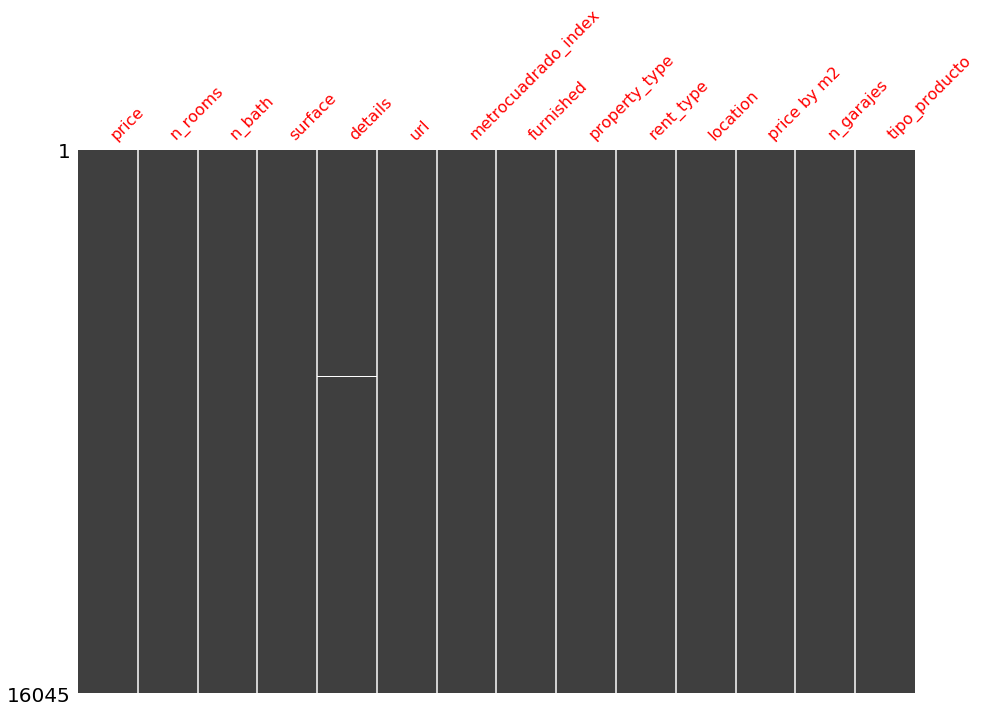

In [641]:
import missingno as msno
fig, ax = plt.subplots(figsize = [15, 10])
msno.matrix(df,ax = ax, sparkline=False)

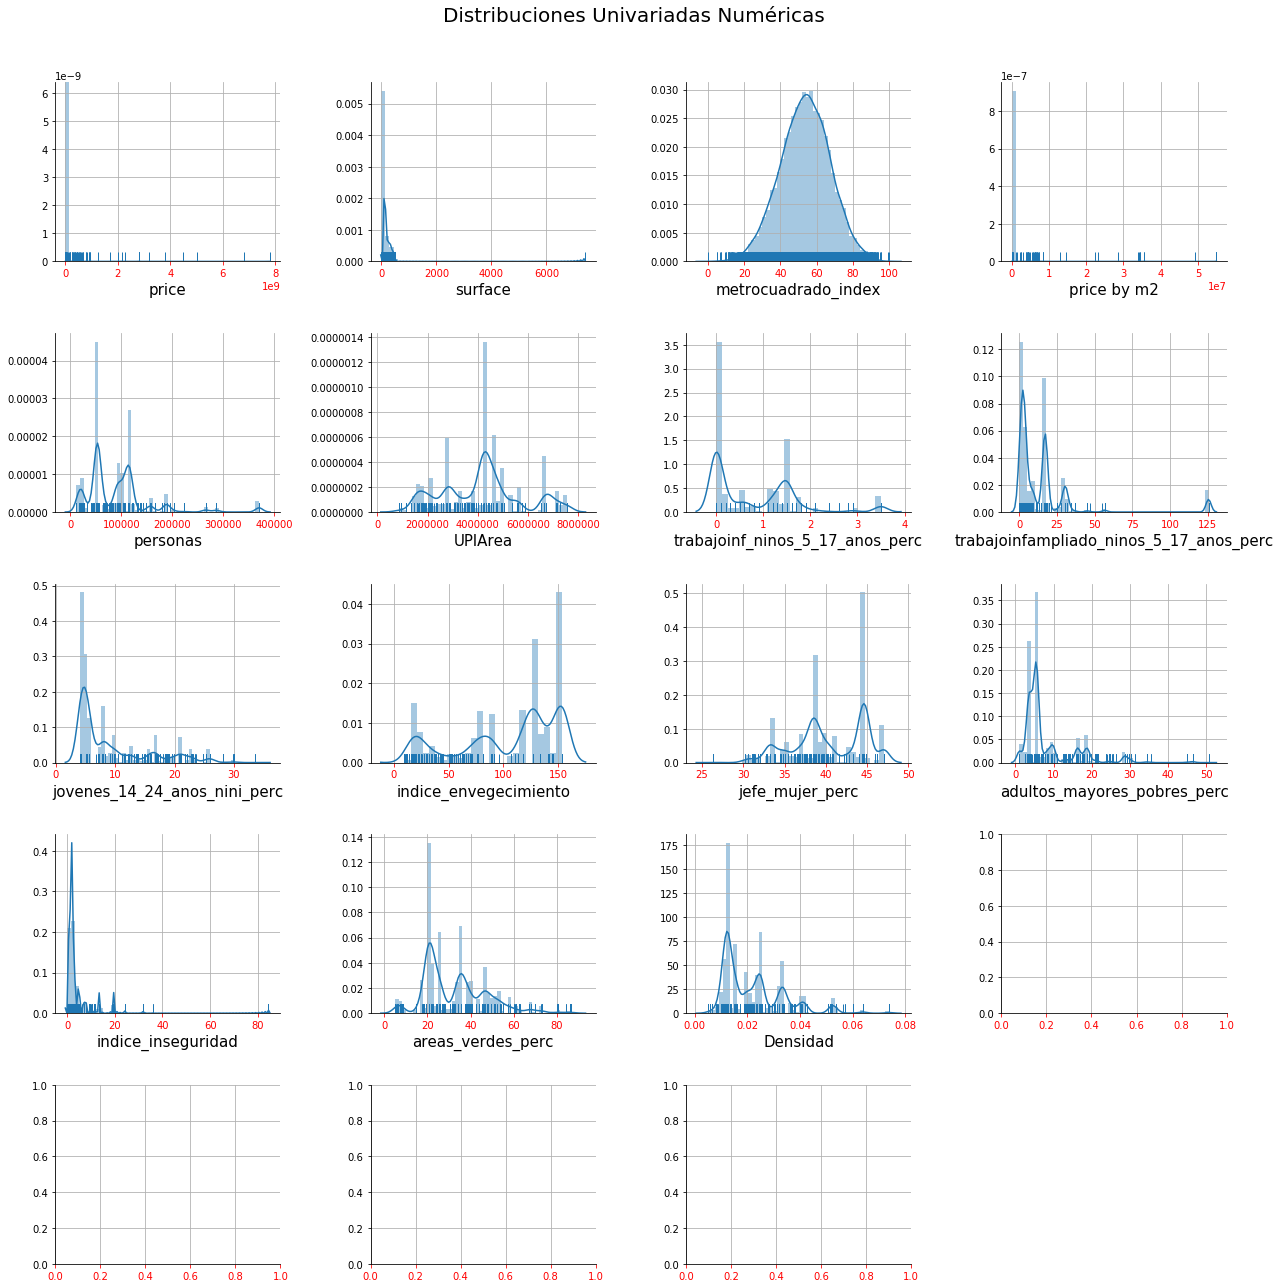

In [592]:
# Grilla de subplots
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=[17, 17])

# Se remueven el ultimo plot
list(map(lambda a : a.remove(), ax[-1,-1:]))

# Se ajusta el espaciado exterior de la figura
fig.tight_layout()

# Se define un titulo y su ubicacion
fig.suptitle('Distribuciones Univariadas Numéricas',
             fontsize=20,
             x=0.5,
             y=1.05)
'''
Se recorre cada axis, para cada columna del dataframe, se genera un grafico 
distinto en funcion del tipo de dato.

'''
for axis, col in zip(ax.flatten(), numerical_info):
    try :
        # Graficos para datos numericos
        sns.distplot(df_cat[('numeric', col)].dropna(), ax=axis, rug=True)
               
    except RuntimeError:
        sns.distplot(df_cat[('numeric', col)], ax=axis, rug=True, kde=False)
    
    axis.set_xlabel(col, fontsize=15)

# Se ajusta el espaciado interno entre subplots
w, h = (.4, .4)
plt.subplots_adjust(wspace=w, hspace=h)

In [593]:
# Grilla de subplots
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=[17, 17])

# Se remueven los ultimos 3 plots
list(map(lambda a : a.remove(), ax[-1,-3:]))

# Se ajusta el espaciado exterior de la figura
fig.tight_layout()

# Se define un titulo y su ubicacion
fig.suptitle('Distribuciones Univariadas Categóricas',
             fontsize=20,
             x=0.5,
             y=1.05)
'''
Se recorre cada axis, para cada columna del dataframe, se genera un grafico 
distinto en funcion del tipo de dato.

'''
for axis, col in zip(ax.flatten(), categorical_info):

    # Graficos para datos tipos str
    sns.countplot(df_cat[('categorical',col)], ax=axis)
    axis.set_axis_off()
    axis.set_title(col, fontsize=15)
  
    
# Se ajusta el espaciado interno entre subplots
h, w = (.4, .1)
plt.subplots_adjust(wspace=w, hspace=h)

In [594]:
def violin_plot(x,y,df=df_cat):
    fontdict = {'fontsize':20}

    # Estrucutra de figura y axes
    fig, ax = plt.subplots(2,1,figsize=[12,13])

    # violin plot --> equivalente a catplot(kind = 'violin')

    sns.violinplot(x,
                y=y,
                data=df,
                kind='violin',
                ax=ax[0])

    sns.countplot(df[x], ax=ax[1])

    ax[0].set_xlabel(x[1], fontdict)
    ax[1].set_xlabel(x[1], fontdict)

    ax[0].set_ylabel(y[1], fontdict)
    ax[0].set_title('Violin plot' + x[1] + ' vs ' + y[1], fontdict)
    ax[1].set_title('Frecuencias ' + x[1], fontdict)

    h, w = (.3, .1)
    plt.subplots_adjust(wspace=w, hspace=h)

/home/jose/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


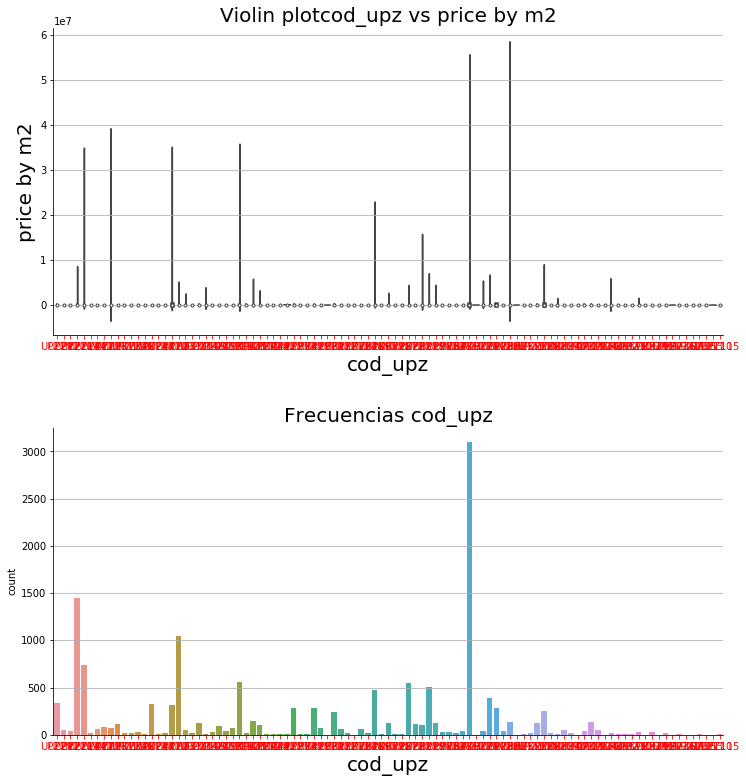

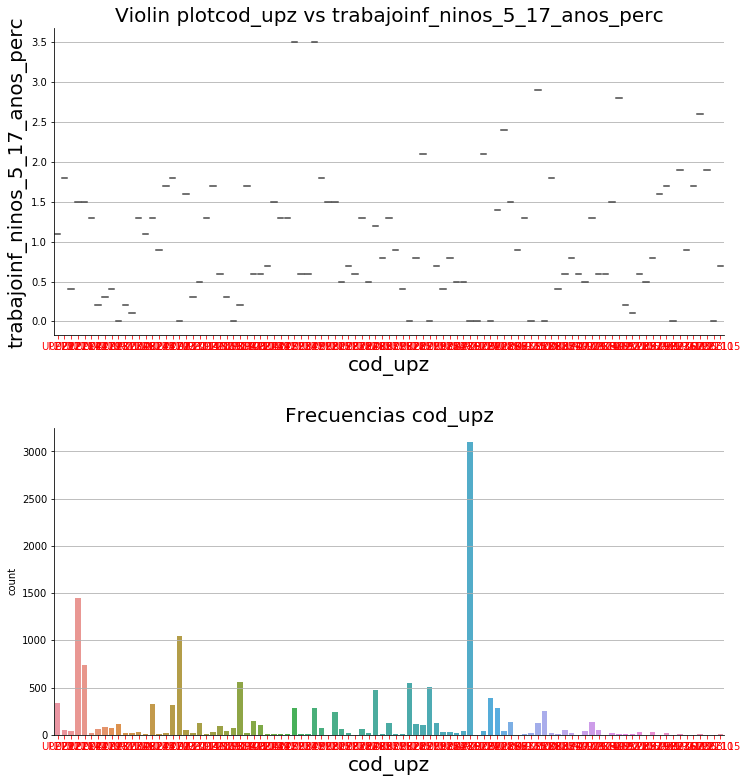

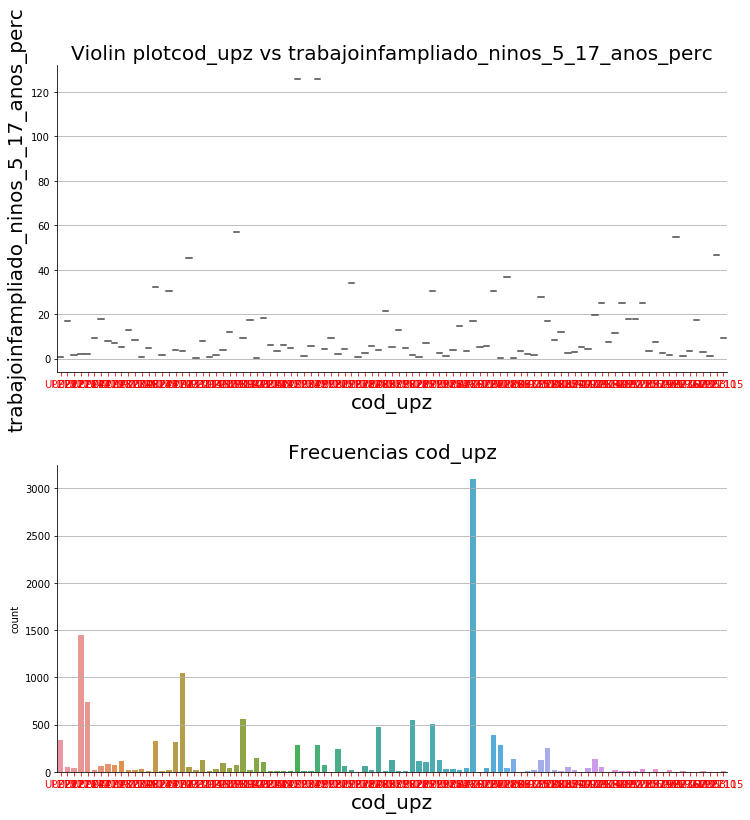

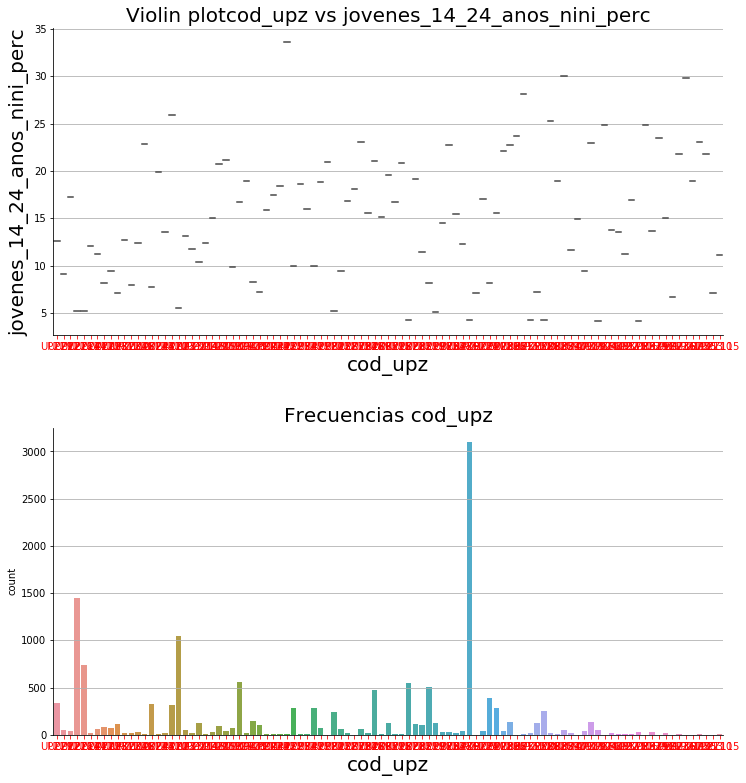

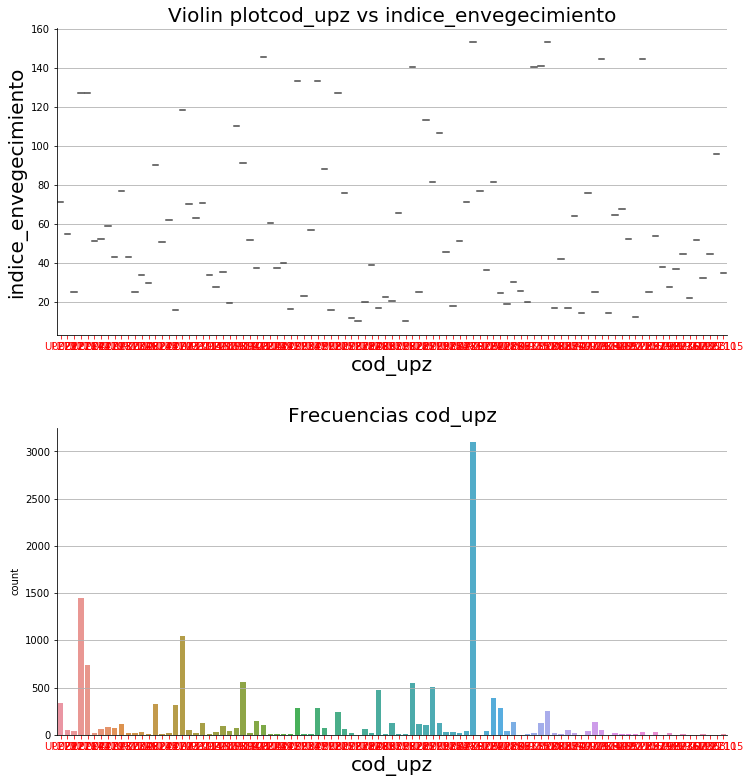

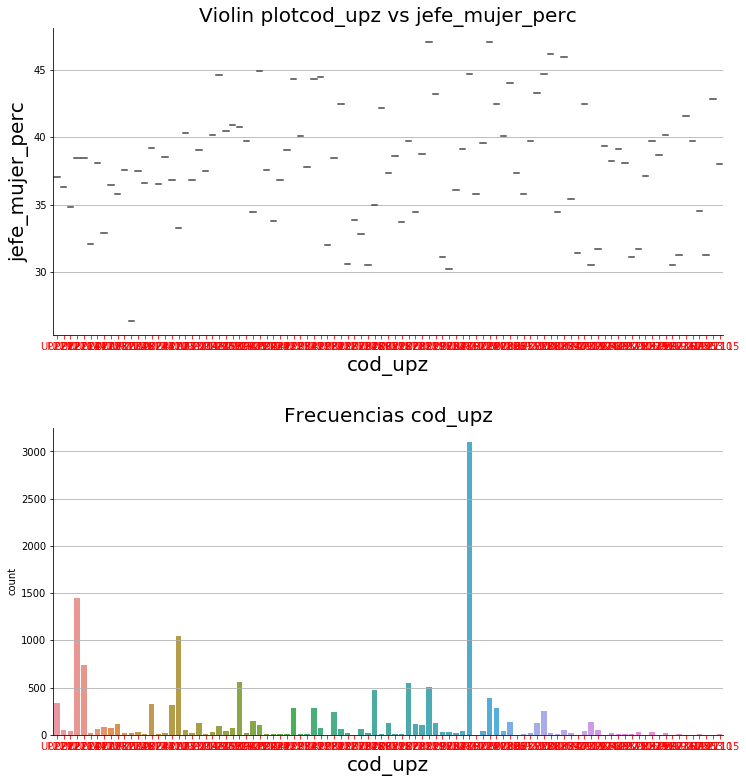

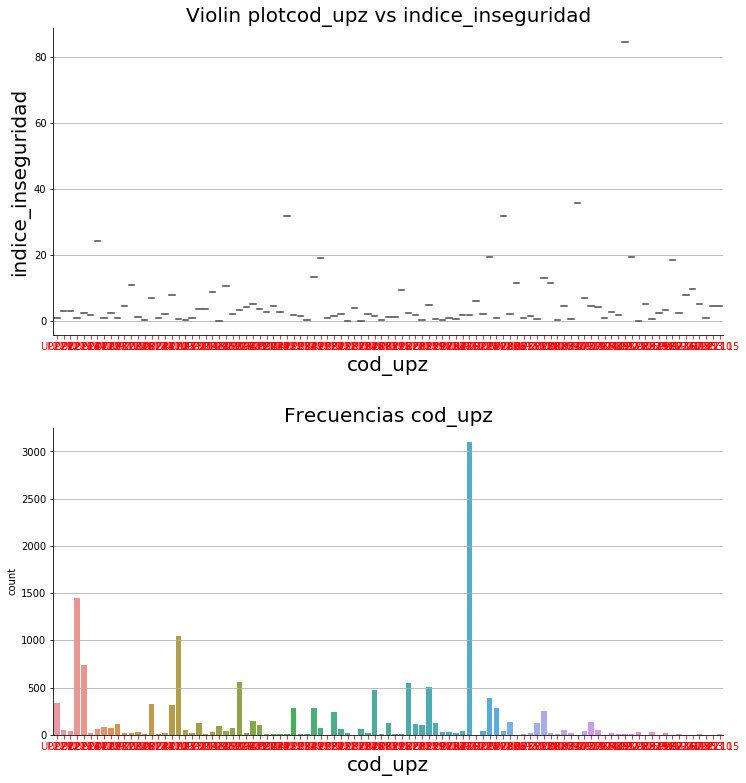

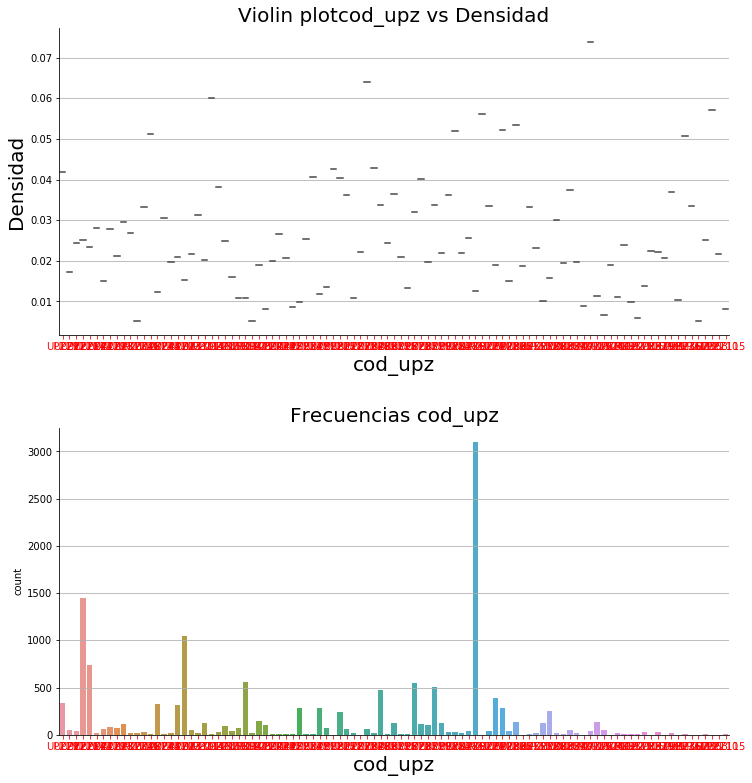

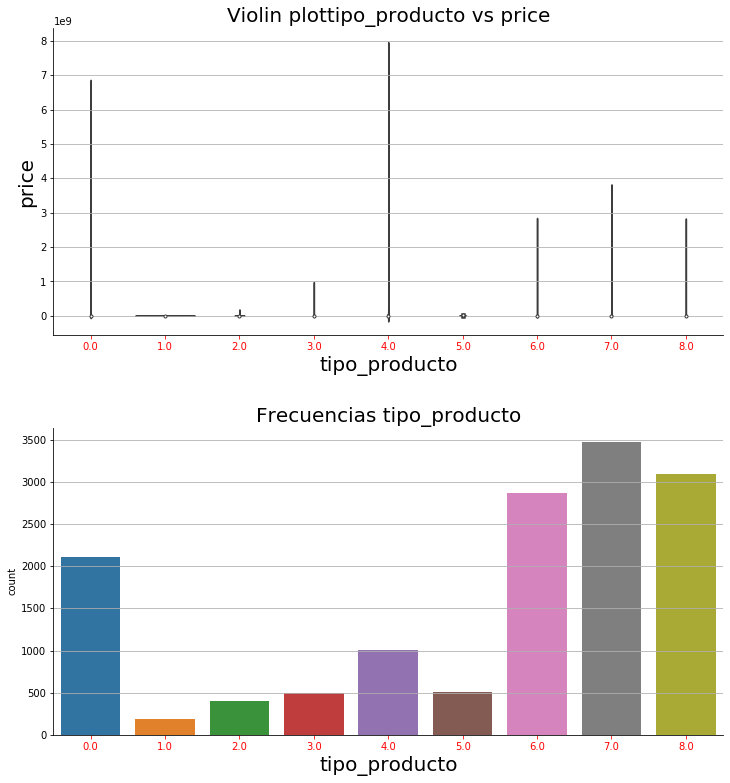

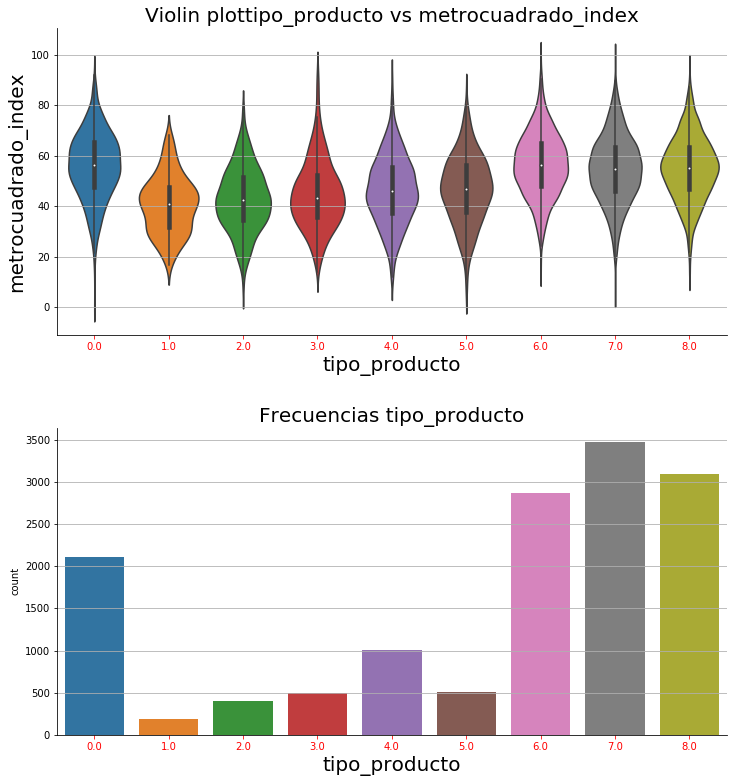

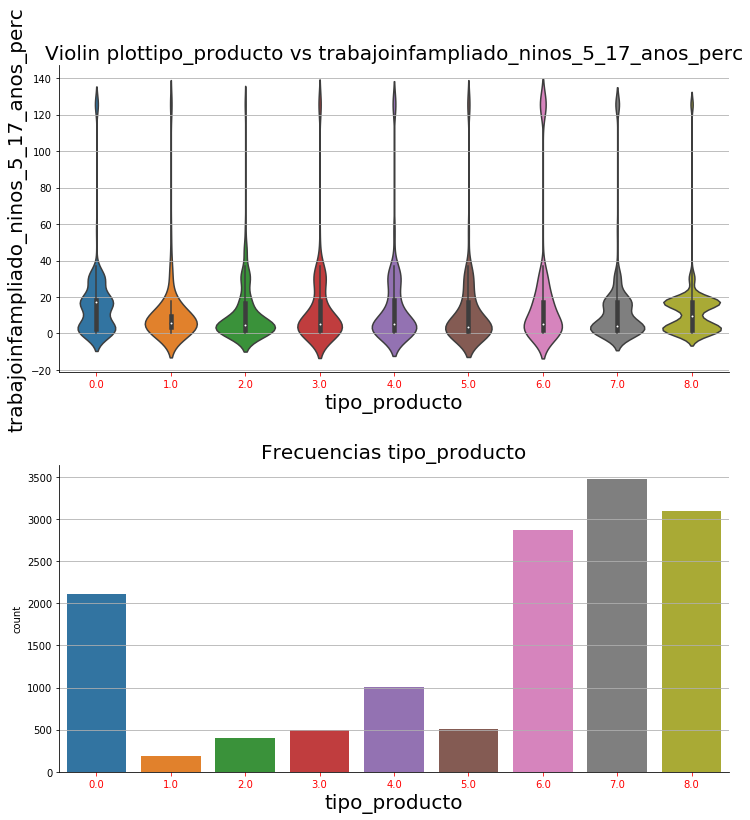

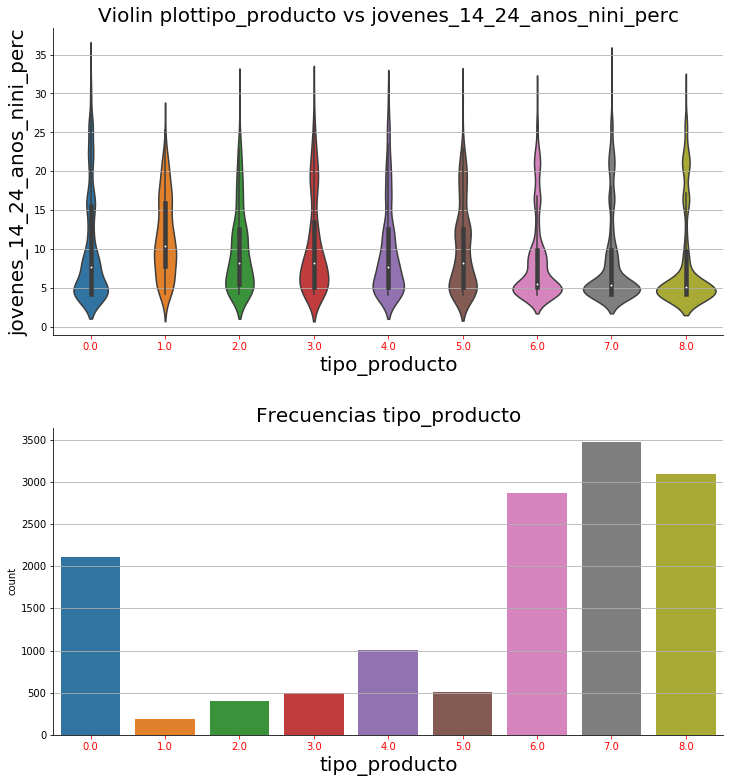

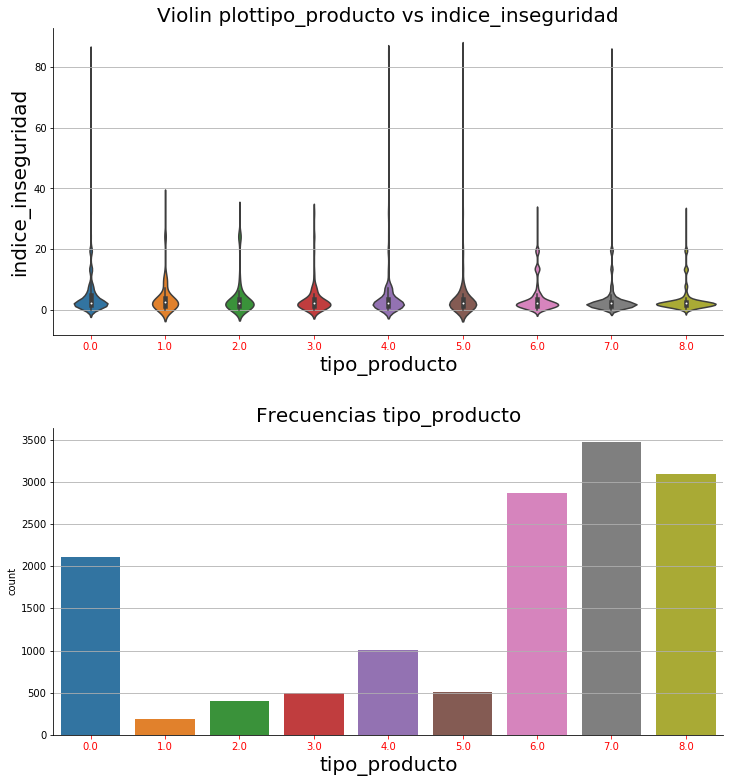

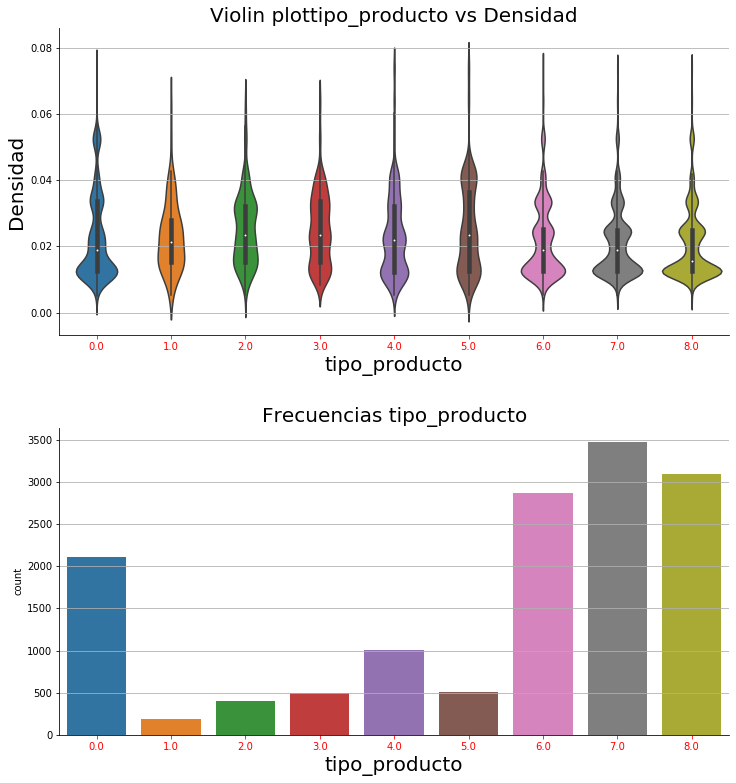

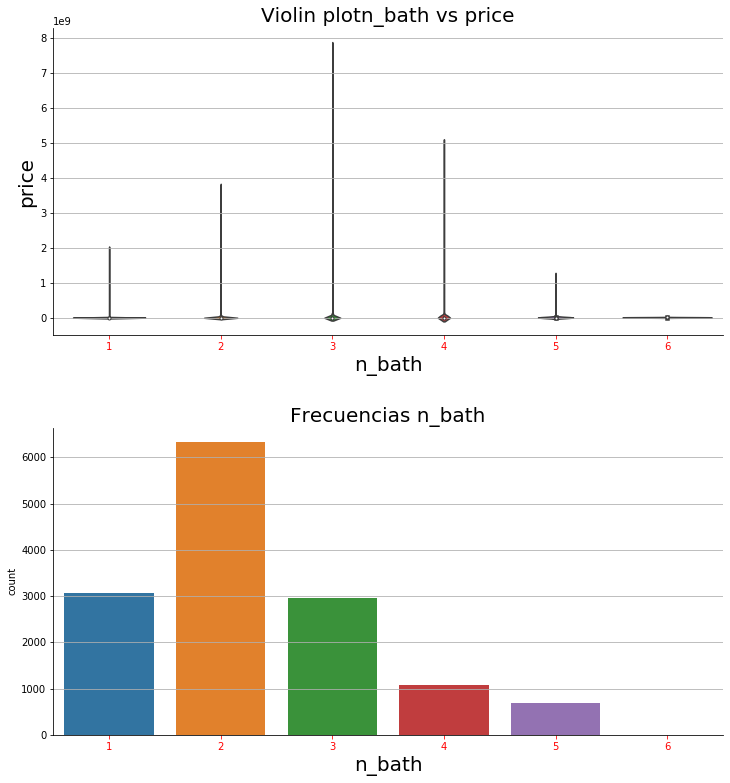

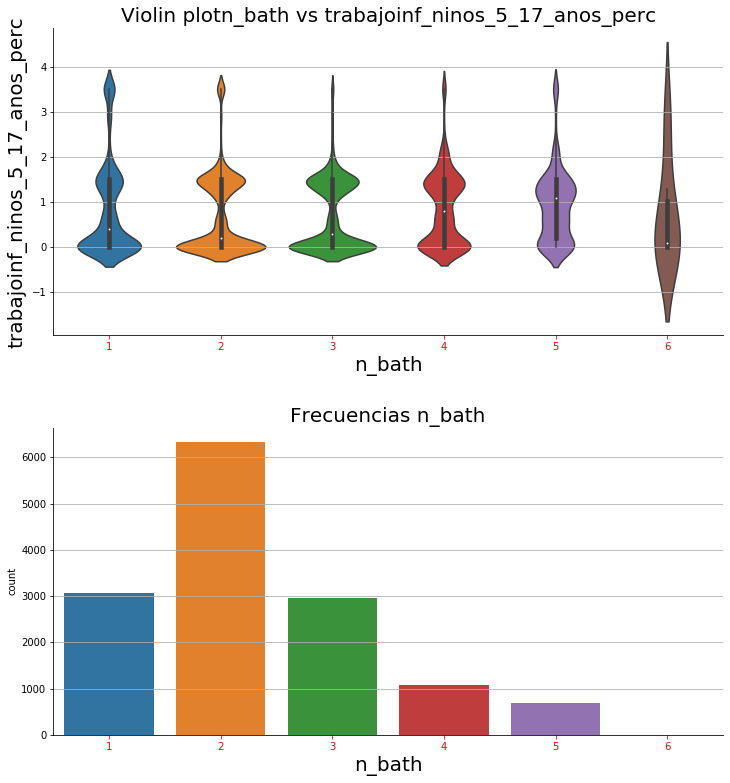

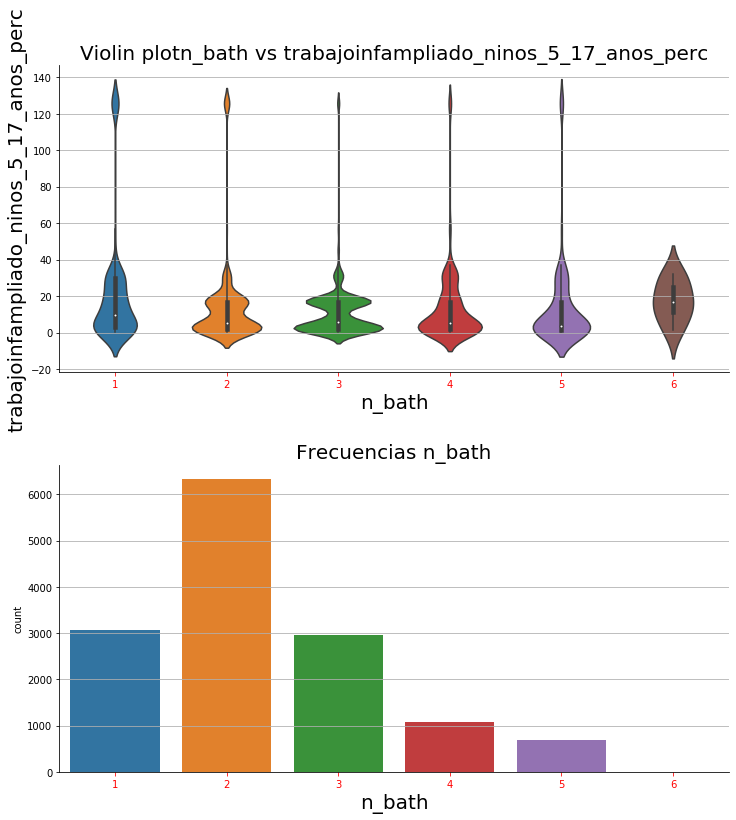

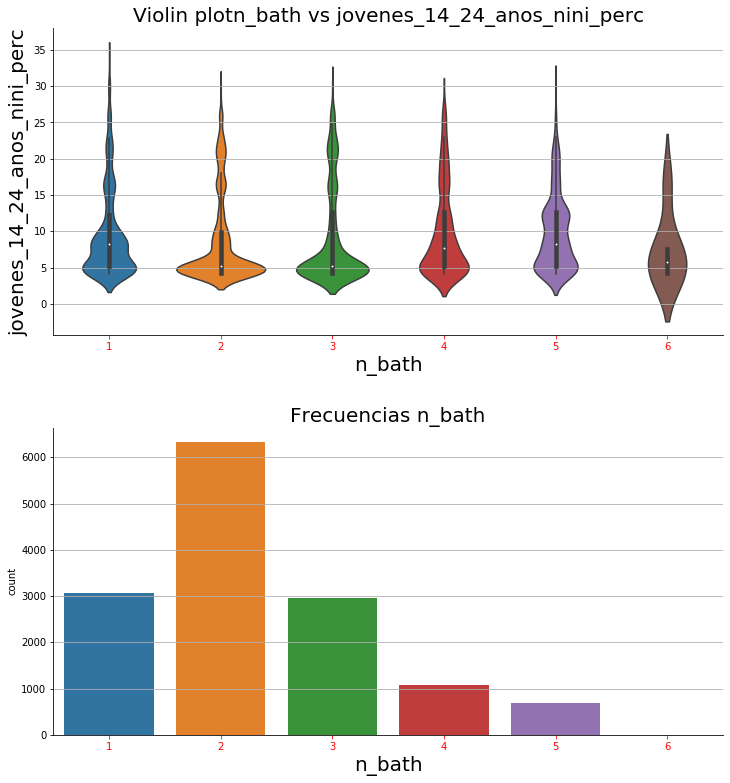

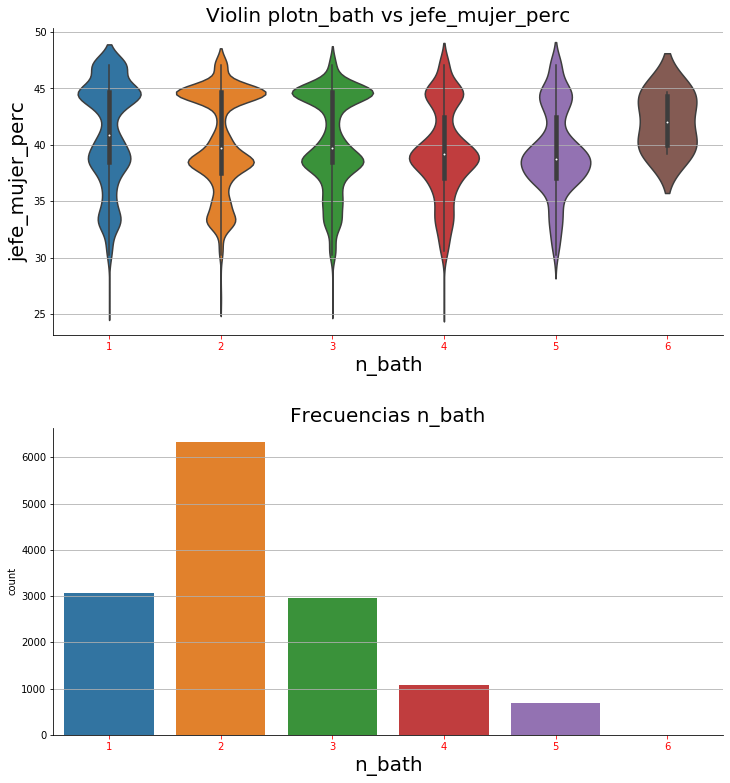

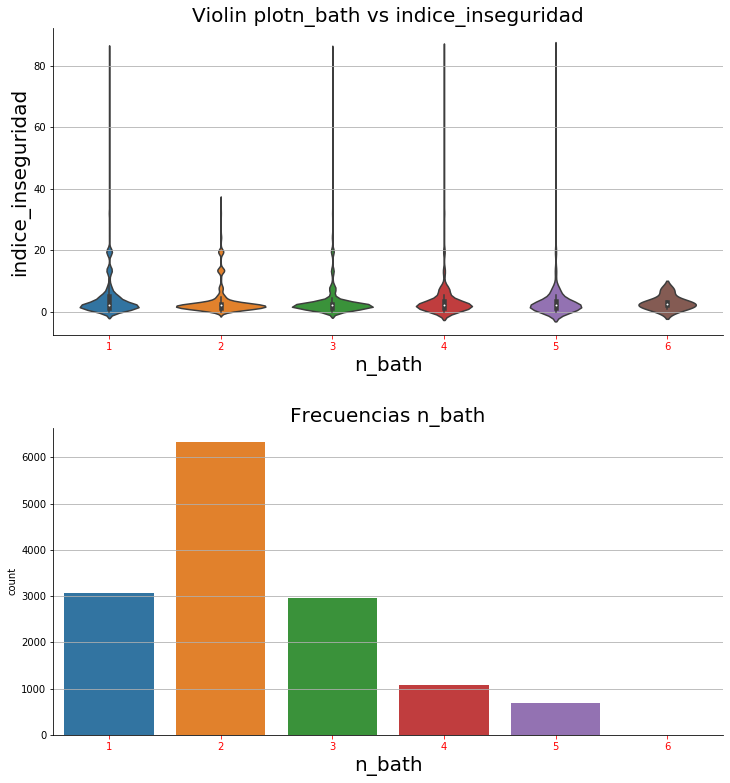

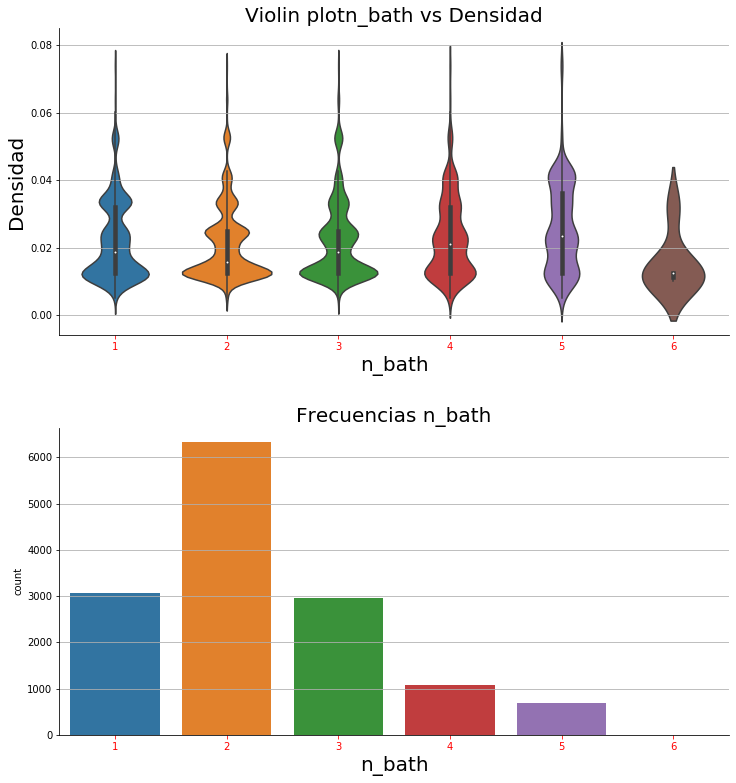

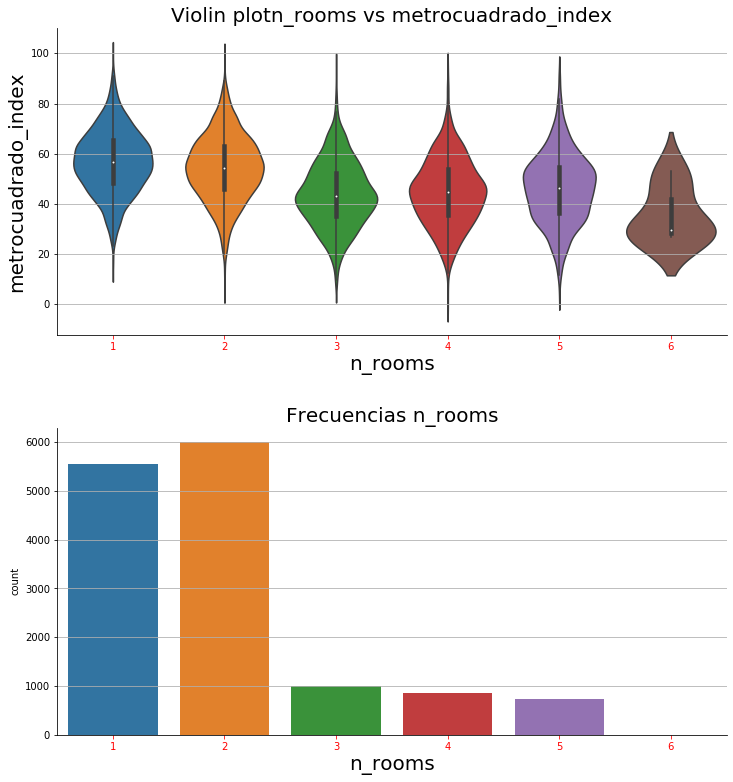

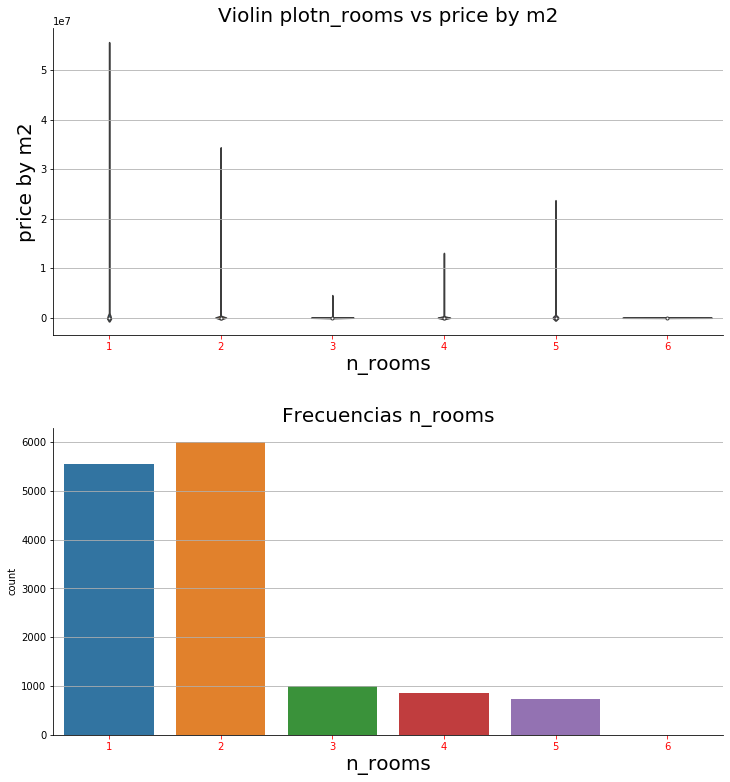

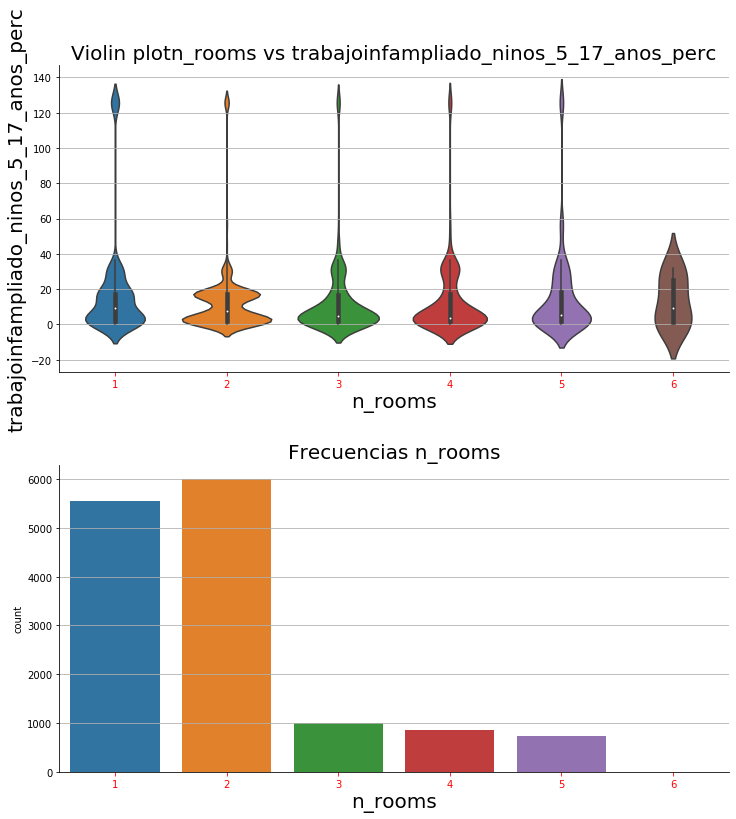

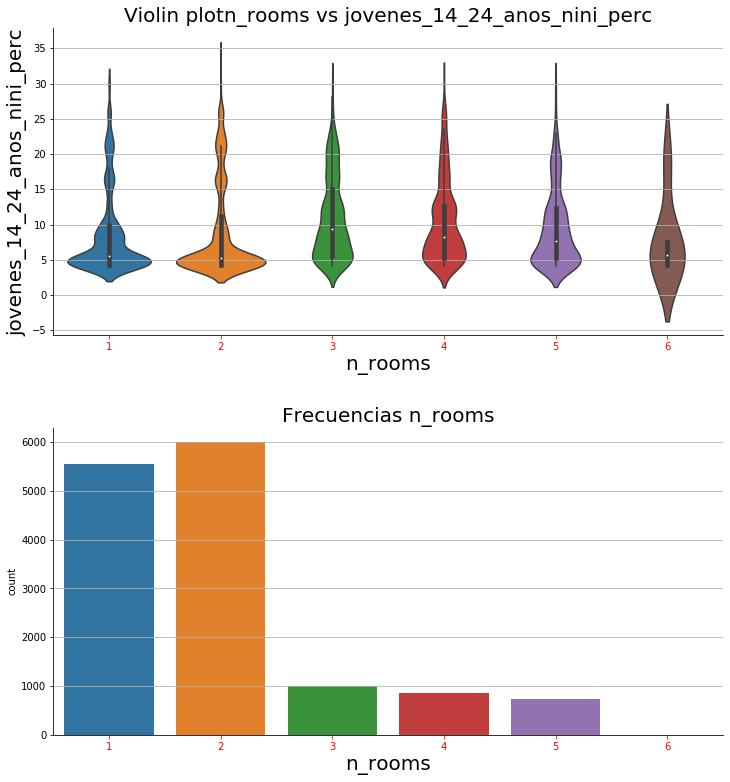

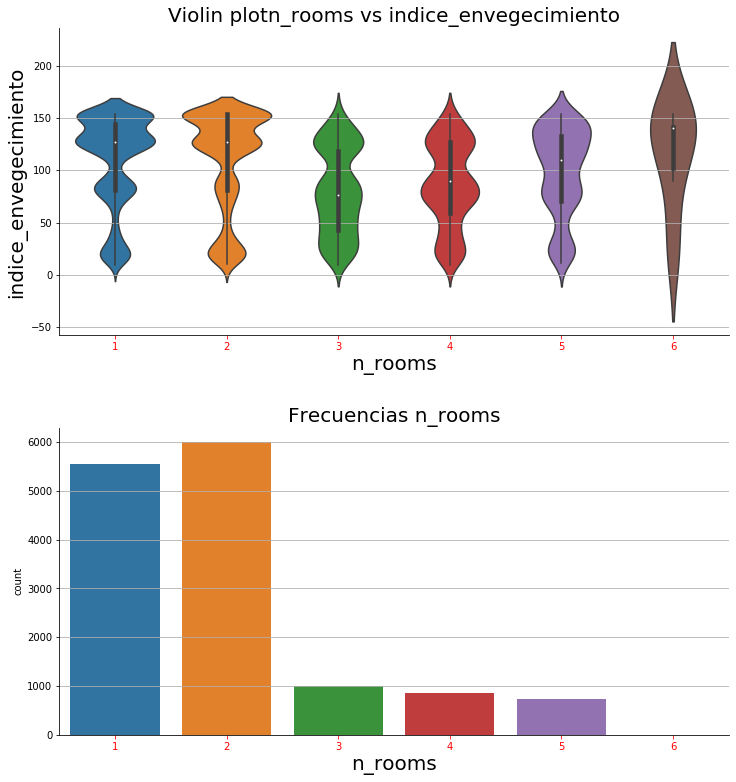

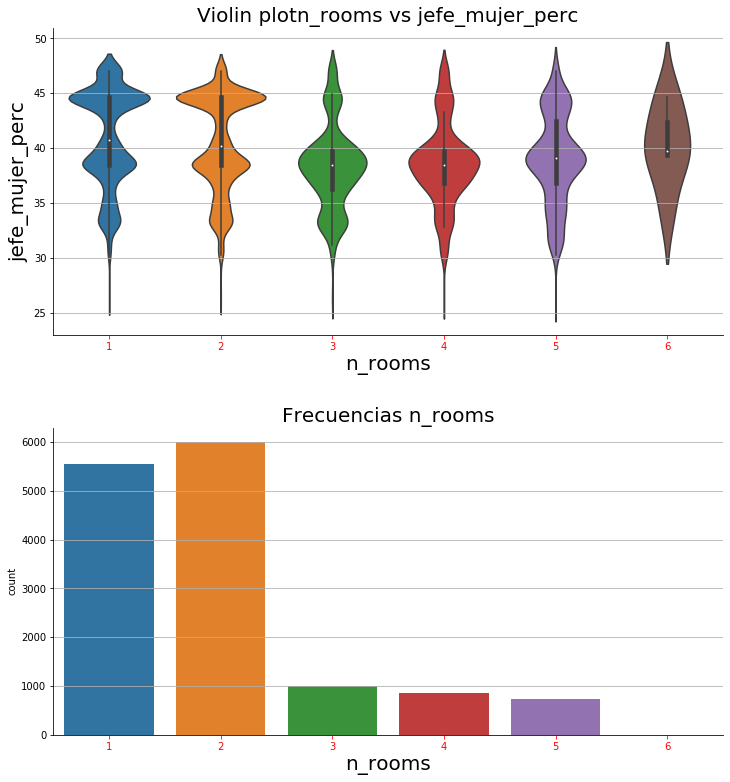

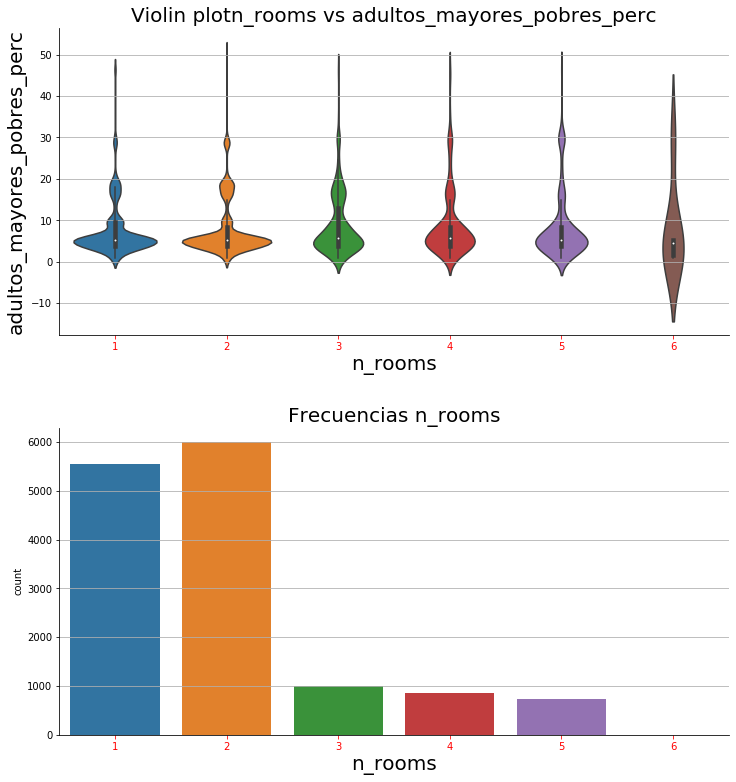

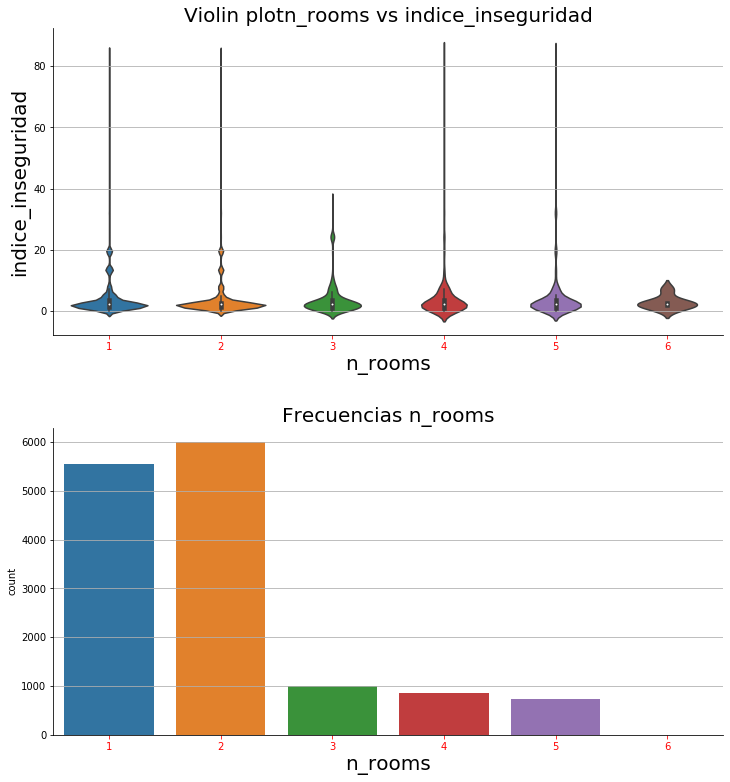

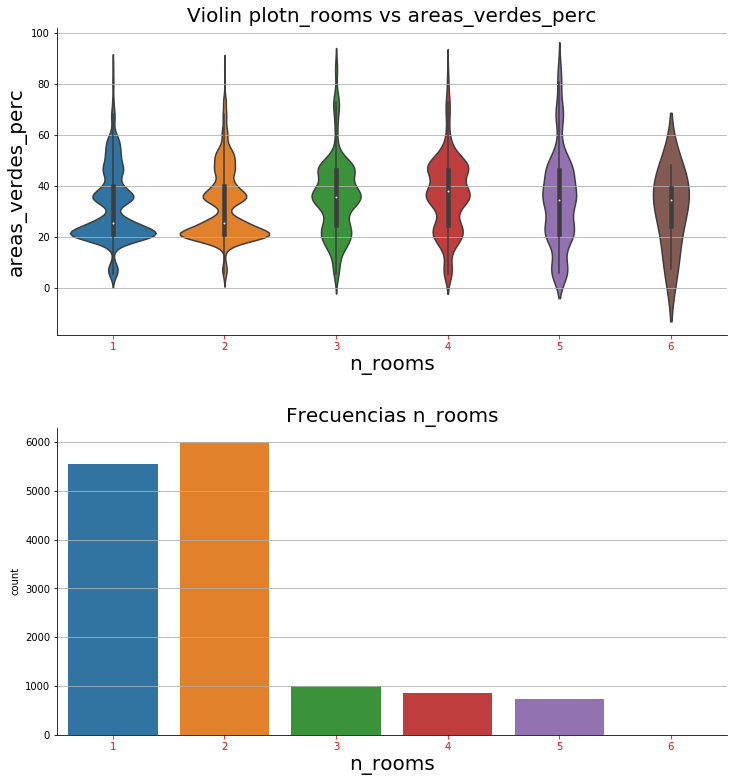

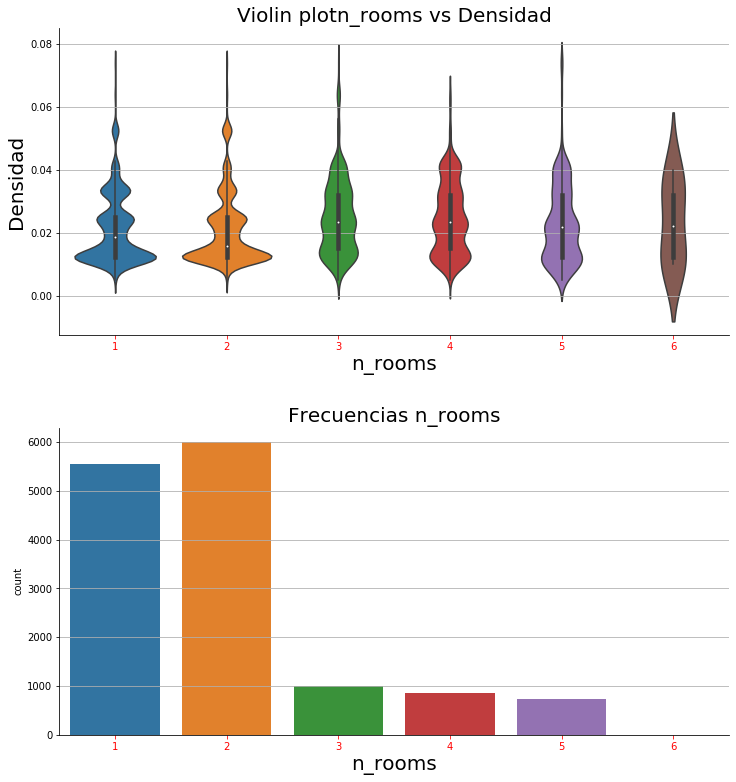

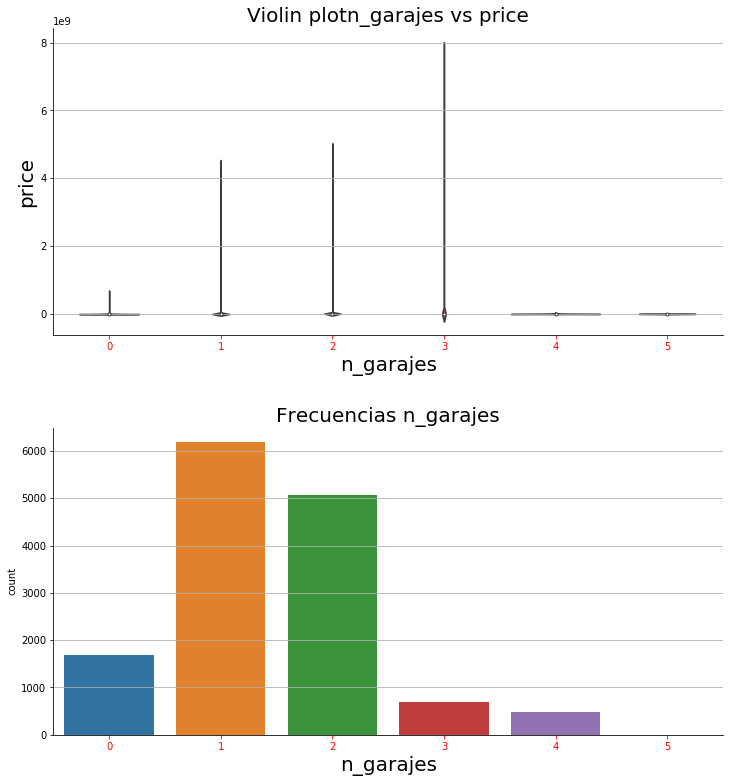

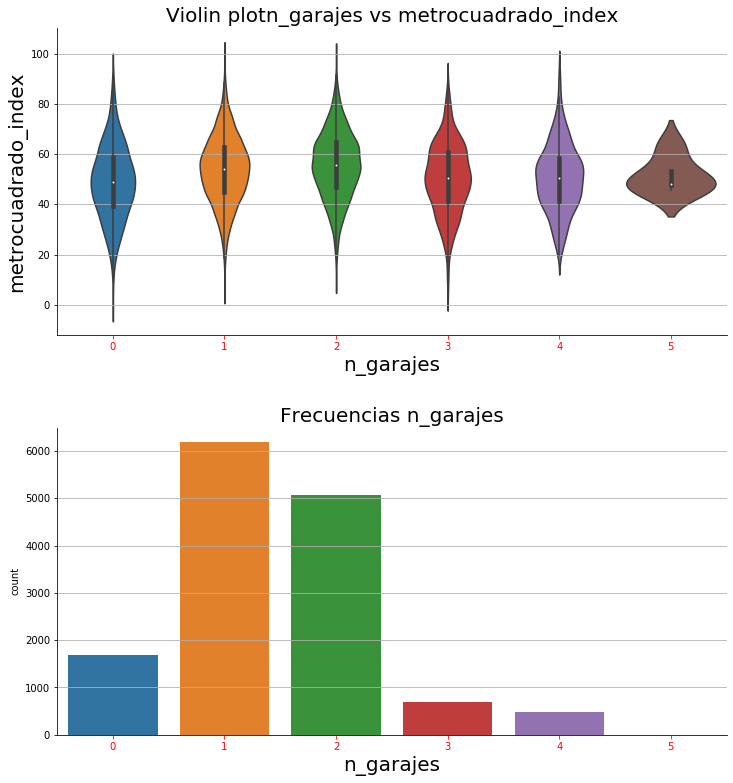

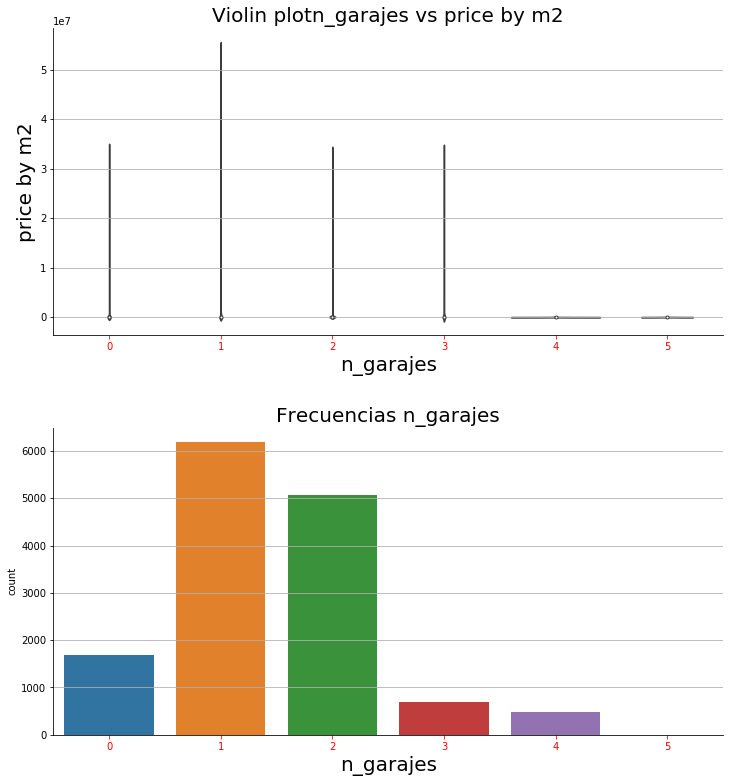

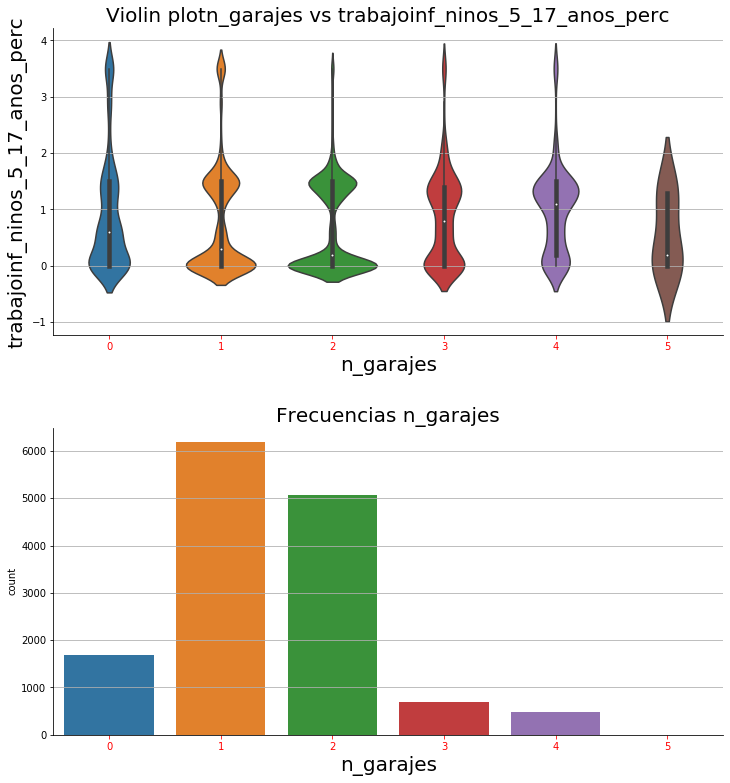

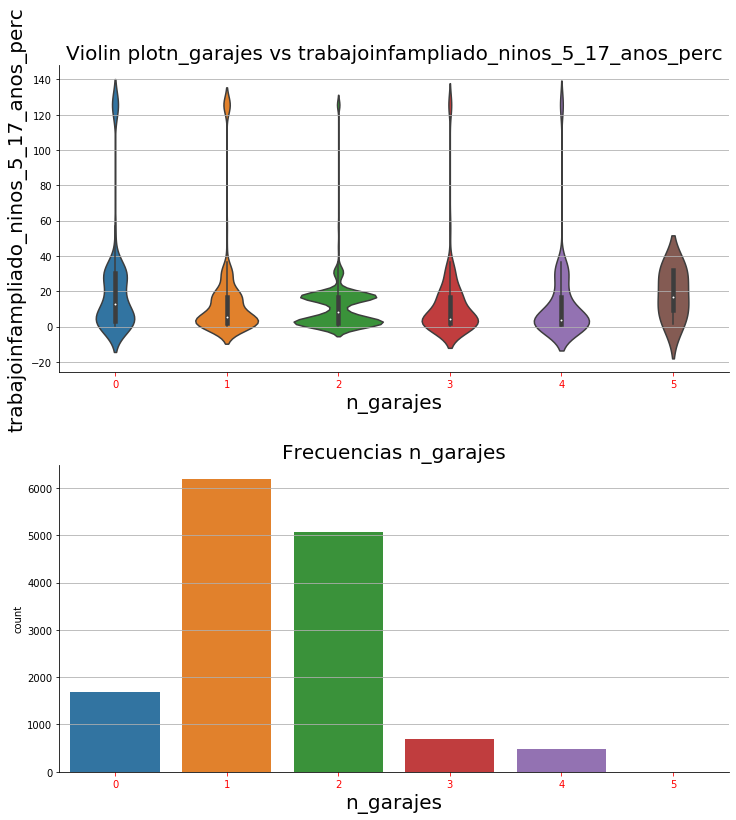

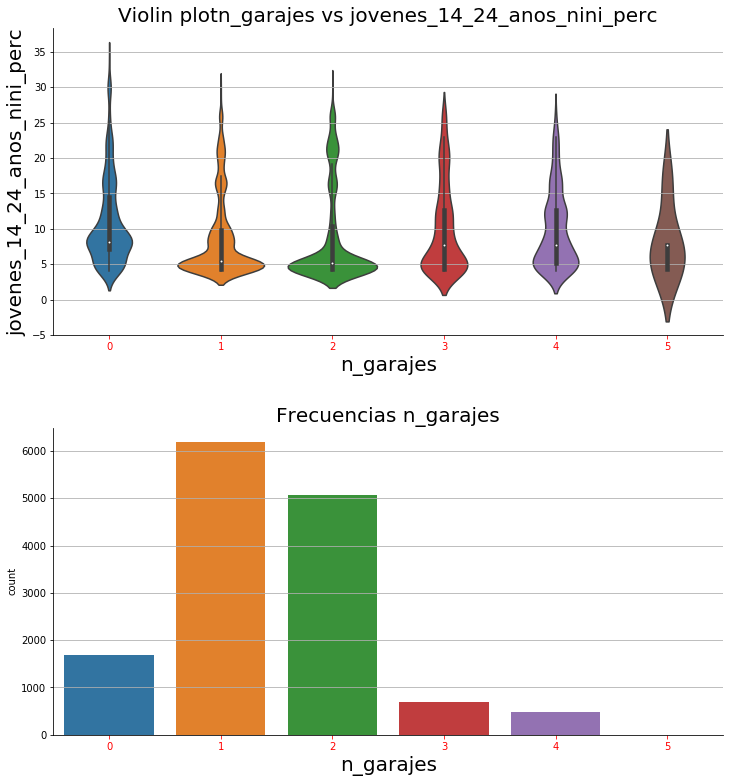

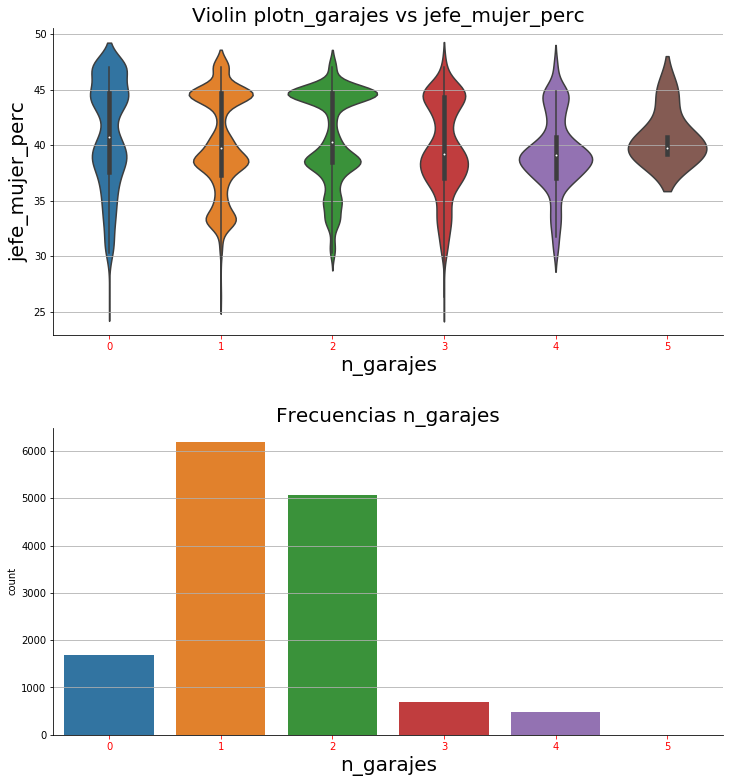

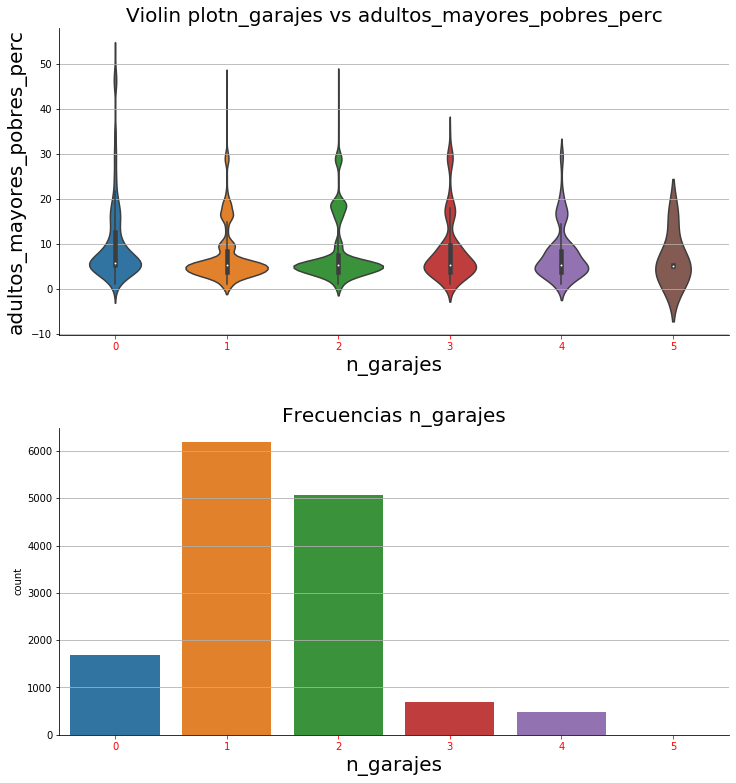

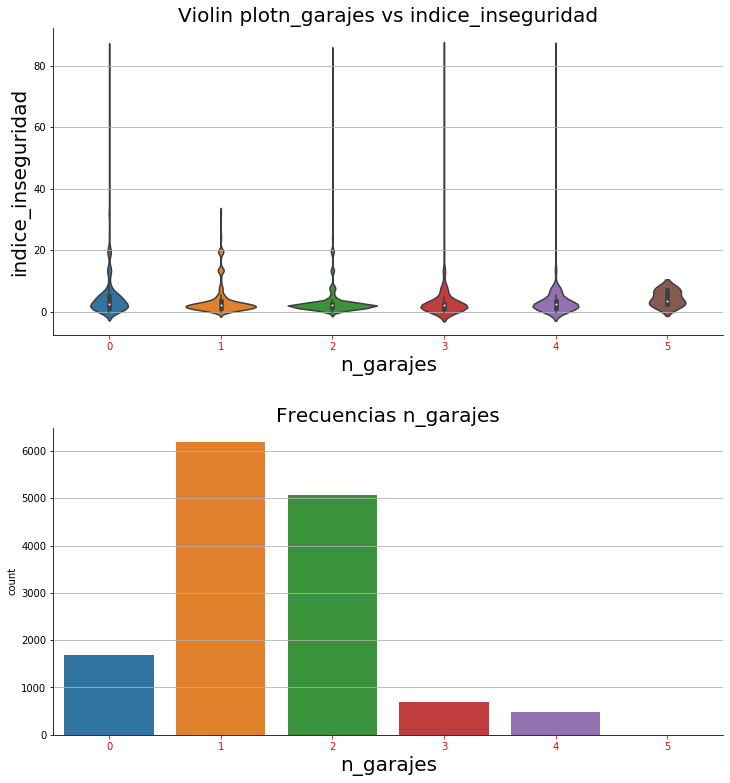

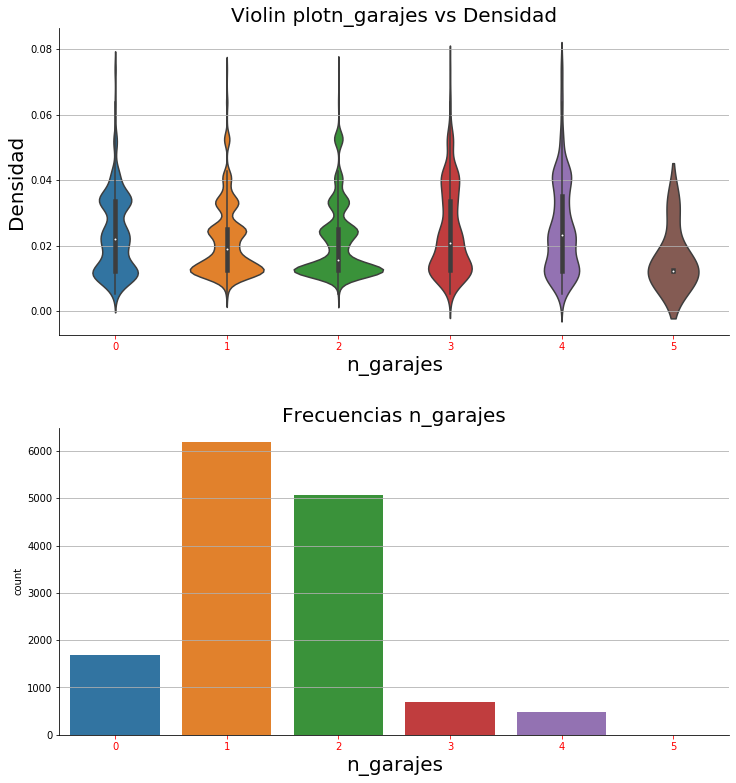

In [595]:
y_plot = [  'price',
            'metrocuadrado_index',
            'price by m2',
            'trabajoinf_ninos_5_17_anos_perc',
            'trabajoinfampliado_ninos_5_17_anos_perc',
            'jovenes_14_24_anos_nini_perc',
            'indice_envegecimiento',
            'jefe_mujer_perc',
            'adultos_mayores_pobres_perc',
            'indice_inseguridad',
            'areas_verdes_perc',
            'Densidad']

x_plot = ['cod_upz', 'tipo_producto', 'n_bath', 'n_rooms', 'n_garajes']

for x in x_plot:
    for y in y_plot:
        violin_plot(x=('categorical', x), y = ('numeric', y))

In [596]:
#4
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [611]:
X = df_STD[general_info]

labels = X['property_type'].unique().tolist()
mapping = dict( zip(labels,range(len(labels))) )
X.replace({'property_type': mapping},inplace=True)


labels = X['rent_type'].unique().tolist()
mapping = dict( zip(labels,range(len(labels))) )
X.replace({'rent_type': mapping},inplace=True)

X.replace([np.inf, -np.inf], np.nan).dropna(subset=["price by m2", "Densidad"], how="all", inplace = True)

X_data = X.values
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X_data)

/home/jose/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6666: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


In [612]:
labels = KMeans(n_clusters = 5, random_state = 13).fit_predict(X_scaled)

In [613]:
X['labels'] = labels
X['labels'].value_counts()

/home/jose/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


4    6405
2    2807
1    1997
0    1666
3    1255
Name: labels, dtype: int64

In [614]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

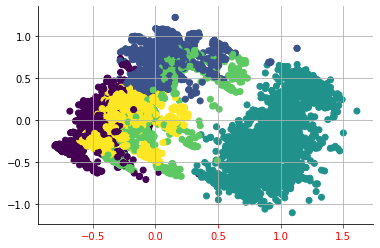

In [615]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=labels)

In [616]:
#5

pca = PCA(n_components=10)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
coef = pca.transform(np.identity(X.shape[1]))

In [621]:
X_data.shape

(14130, 18)

In [626]:
X.loc[0]

n_rooms                                            5
n_bath                                             4
metrocuadrado_index                               56
furnished                                      False
property_type                                      0
rent_type                                          0
price by m2                                  47887.3
n_garajes                                          0
tipo_producto                                      0
trabajoinf_ninos_5_17_anos_perc                  1.1
trabajoinfampliado_ninos_5_17_anos_perc          0.8
jovenes_14_24_anos_nini_perc                    12.6
indice_envegecimiento                           71.1
jefe_mujer_perc                              37.0733
adultos_mayores_pobres_perc                  8.40636
indice_inseguridad                           1.02916
areas_verdes_perc                            37.8523
Densidad                                   0.0418939
labels                                        

In [627]:
X_data[0]

array([5, 4, 56.0, False, 0, 0, 47887.32394366197, 0, 0.0, 1.1, 0.8, 12.6,
       71.1, 37.073313660241524, 8.406360283912923, 1.0291595197299999,
       37.85228883157063, 0.041893884036552406], dtype=object)

In [630]:
pca_10 = pd.DataFrame(coef, index=general_info).abs()
pca_10

0         1         2  \
n_rooms                                  1.177003  0.002444  0.452202   
n_bath                                   1.112732  0.015431  0.385212   
metrocuadrado_index                      0.765030  0.149621  0.434975   
furnished                                0.643427  0.100315  0.676840   
property_type                            0.179002  0.475856  0.294129   
rent_type                                0.992808  0.013599  0.432488   
price by m2                              0.854858  0.171205  0.443453   
n_garajes                                0.971767  0.041856  0.347748   
tipo_producto                            0.500734  0.239549  0.082374   
trabajoinf_ninos_5_17_anos_perc          0.938427  0.401277  0.424618   
trabajoinfampliado_ninos_5_17_anos_perc  0.816341  0.132530  0.505299   
jovenes_14_24_anos_nini_perc             1.012119  0.579536  0.414923   
indice_envegecimiento                    0.560246  0.469341  0.484748   
jefe_mujer_perc                          0.723330  0.023351  0.510281   
adultos_mayores_pobres_perc              0.934155  0.403717  0.431594   
indice_inseguridad                       0.861432  0.190821  0.456240   
areas_verdes_perc                        0.948738  0.358450  0.410271   
Densidad                                 0.948544  0.353764  0.405329   

                                                3         4         5  \
n_rooms                                  0.076870  0.034860  0.445983   
n_bath                                   0.059618  0.003743  0.463223   
metrocuadrado_index                      0.071237  0.243163  0.510064   
furnished                                0.799868  0.192047  0.474602   
property_type                            0.235571  0.407980  0.611201   
rent_type                                0.080669  0.514951  0.522045   
price by m2                              0.137464  0.170249  0.501199   
n_garajes                                0.064874  0.060326  0.493625   
tipo_producto                            0.104559  0.631772  0.289482   
trabajoinf_ninos_5_17_anos_perc          0.122668  0.284203  0.258366   
trabajoinfampliado_ninos_5_17_anos_perc  0.196612  0.352227  0.047573   
jovenes_14_24_anos_nini_perc             0.038851  0.187195  0.481691   
indice_envegecimiento                    0.271182  0.203288  0.345110   
jefe_mujer_perc                          0.162006  0.372713  0.372584   
adultos_mayores_pobres_perc              0.075826  0.188046  0.492337   
indice_inseguridad                       0.141553  0.194523  0.462017   
areas_verdes_perc                        0.112731  0.139298  0.414931   
Densidad                                 0.088395  0.138077  0.612507   

                                                6         7         8  \
n_rooms                                  0.334742  0.770104  0.007077   
n_bath                                   0.343578  0.389509  0.005956   
metrocuadrado_index                      0.334730  0.611243  0.011933   
furnished                                0.451663  0.915856  0.007396   
property_type                            0.472093  0.472459  0.039425   
rent_type                                0.399452  1.004241  0.018578   
price by m2                              0.395598  0.858255  0.025287   
n_garajes                                0.384119  0.192003  0.057416   
tipo_producto                            0.233694  0.984762  0.050461   
trabajoinf_ninos_5_17_anos_perc          0.734074  0.733430  0.355472   
trabajoinfampliado_ninos_5_17_anos_perc  0.130783  0.980793  0.274969   
jovenes_14_24_anos_nini_perc             0.096857  0.802600  0.031760   
indice_envegecimiento                    0.601315  0.817309  0.056853   
jefe_mujer_perc                          0.311820  0.740870  0.195674   
adultos_mayores_pobres_perc              0.132315  0.818721  0.004304   
indice_inseguridad                       0.311378  0.870526  0.161412   
areas_verdes_perc              

In [635]:
pca_10.idxmax()

0                            n_rooms
1       jovenes_14_24_anos_nini_perc
2                          furnished
3                          furnished
4                      tipo_producto
5                           Densidad
6    trabajoinf_ninos_5_17_anos_perc
7                          rent_type
8                  areas_verdes_perc
9       jovenes_14_24_anos_nini_perc
dtype: object

In [ ]:
def scatter_dists(col, df=df_STD, h=.3, w=.1, fontdict={'fontsize': 20}, reg=True):
    ''' Recibe una columna numerica y genera una visualizacion comparativa.
    
    Genera una figura por sobre el dataframe HousePricing (por defecto), recibe 
    parametros extra como el espaciado entre subfigura.
    
    Args:
    ----------
    
    col: String
         El nombre de la columna numerica a visualizar
    
    h,w: float
        Espaciado entre subplot h -> vertical, w -> horizontal
    
    fontdict: dict
             Permite configurar las fuentes de los subplots
    reg: bool
         Permite graficar una regresion lineal sobre los datos (if True)
        
    Returns: None
        Se muestra una figura en pantalla    
    
    '''

    # Estrucutra de figura y axes
    fig, ax = plt.subplots(2, 1, figsize=[12, 13])

    # violin plot --> equivalente a catplot(kind = 'violin')

    if reg:
        sns.regplot(x=df[('numeric', col)],
                    y=df[('numeric', 'SalePrice')],
                    ax=ax[0])
        ax[0].set_title('Regplot plot {} vs SalePrice'.format(col), fontdict)
    else:
        sns.scatterplot(('numeric', col),
                        y=('numeric', 'SalePrice'),
                        data=df,
                        ax=ax[0])
        ax[0].set_title('Scatter plot {} vs SalePrice'.format(col), fontdict)

    
    # Distribucion univariada
    sns.distplot(df[('numeric', col)], ax=ax[1])

    ax[0].set_xlabel(col, fontdict)
    ax[1].set_xlabel(col, fontdict)

    ax[0].set_ylabel('SalePrice', fontdict)
    ax[1].set_title('Frecuencias {}'.format(col), fontdict)

    plt.subplots_adjust(wspace=w, hspace=h)